##### DS-38 | Sagarmoy Sarkar                     

# Credit EDA Assignment

**Problem Statement**
<br>
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. In this case study we will use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

**Aim of the Case Study**
<br>
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

- ### **Importing the libraries**

In [1]:
# import the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

- ### **Reading the Dataset**

In [3]:
# read the dataset of 'application_data.csv' in application which contains information of the client at the time of application
application = pd.read_csv("application_data.csv")

In [4]:
# let's have a look in the application dataset
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# read the dataset of 'previous_application.csv' in prev_application which contains information about the client’s previous loan data
prev_application = pd.read_csv("previous_application.csv")

In [6]:
# Let's have a look in the previous application dataset
prev_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


- ### **Cleaning the application dataset**

In [7]:
# checking the shape of application dataset
application.shape

(307511, 122)

In [8]:
# print the information of application dataset to check their data types
application.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [9]:
# checking the null value count
application.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
# check the numerical columns of the application dataset for anomalies
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [11]:
# get the null value percentage of all columns in application dataset
application_null_perc = application.isnull().sum()/len(application)*100

In [12]:
# checking the columns with null percentage
application_null_perc.sort_values(ascending=False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

- **Dropping columns**
<br>
We can observe that, there are columns with more than half of the missing values, and we can drop the columns with more than 40% of missing values present in them, if these columns are imputed then the analysis can results to a very different outcome.

In [13]:
# counting the number of columns with more than 40% of null values
print("Number of columns with more than 40% of null values: ", len(application_null_perc[application_null_perc.values > 40.0]))

Number of columns with more than 40% of null values:  49


In [14]:
# get the number of columns
application_columns = application.columns.to_list()
print("Columns in application dataset: ", len(application_columns))
application_columns

Columns in application dataset:  122


['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [15]:
# method to get null value percentage of a column in application
def null_percentage_application(col):
    null_percentage = (application[col].isnull().sum()/application[col].shape[0])*100
    return round(null_percentage, 2)

In [16]:
# drop the columns in applications with more than 40% null values
for col in application_columns:
    if null_percentage_application(col)>40.0:
        application.drop([col], axis=1, inplace=True)
    else:
        pass

In [17]:
# checking the application dataset after dropping columns which have more than 40% null values
application.shape

(307511, 73)

In [18]:
# checking the numerical columns of application
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000

In [19]:
# recheck the null percentage after dropping the columns
application_null_perc = application.isnull().sum()/len(application)*100
application_null_perc.sort_values(ascending=False).head(50)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


In [20]:
# checking columns with null values then analysing them
application_null_perc[application_null_perc.values > 0.0].sort_values(ascending=False)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

**Handling missing values in 'OCCUPATION_TYPE' column**

In [21]:
# null value count in OCCUPATION_TYPE column
application.OCCUPATION_TYPE.isnull().sum()

96391

In [22]:
# checking the most number of applicants occupation type
application.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

We can see that 'Laborers' is the most commmon occupation type but that is less than the total null value present. We can say that there are some reason behind the missing values and are missing at random i.e. **MAR**, as some individuals don't want to disclose their occupation types. Thus, we can replace the null value in Occypation type column by introducing a **'Unknown'** as occupation type.

In [23]:
# checking 'OCCUPATION_TYPE' column
application.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [24]:
# filling null value of OCCUPATION_TYPE column as 'Unknown'
application.loc[application.OCCUPATION_TYPE.isnull(), 'OCCUPATION_TYPE'] = "Unknown"

In [25]:
# rechecking null value count in OCCUPATION_TYPE column
application.OCCUPATION_TYPE.isnull().sum()

0

In [26]:
# re-checking 'OCCUPATION_TYPE' column
application.OCCUPATION_TYPE.value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

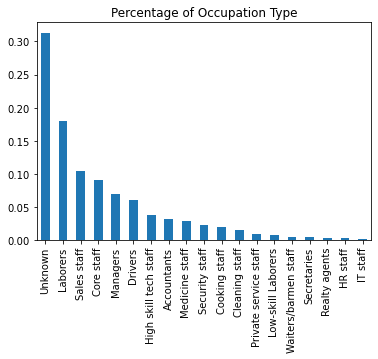

In [27]:
# Plotting the Occupation type column
plt.title('Percentage of Occupation Type')
application.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

**Handling missing values in 'AMT_REQ_CREDIT_BUREAU_YEAR' column**

In [28]:
# Total missing in 'AMT_REQ_CREDIT_BUREAU_YEAR' column
application.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

41519

In [29]:
# checkingg the values count in AMT_REQ_CREDIT_BUREAU_YEAR column
application.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
18.0        4
19.0        4
16.0        3
25.0        1
21.0        1
22.0        1
20.0        1
23.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [30]:
application.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [31]:
# checking the mode in 'AMT_REQ_CREDIT_BUREAU_YEAR' column
amt_req_credit_bureau_year_mode = float(application.AMT_REQ_CREDIT_BUREAU_YEAR.mode())
amt_req_credit_bureau_year_mode

0.0

In [32]:
# Imputing the AMT_REQ_CREDIT_BUREAU_YEAR column with mode value
application.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(amt_req_credit_bureau_year_mode, inplace=True)

In [33]:
# rechecking missing value in AMT_REQ_CREDIT_BUREAU_YEAR
application.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

In [34]:
application.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     113320
1.0      63405
2.0      50192
3.0      33628
4.0      20714
5.0      12052
6.0       6967
7.0       3869
8.0       2127
9.0       1096
11.0        31
12.0        30
10.0        22
13.0        19
14.0        10
17.0         7
15.0         6
18.0         4
19.0         4
16.0         3
25.0         1
21.0         1
22.0         1
20.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [35]:
application.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    307511.000000
mean          1.643447
std           1.855821
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

For, 
**AMT_REQ_CREDIT_BUREAU_QRT<br>
AMT_REQ_CREDIT_BUREAU_MON<br>
AMT_REQ_CREDIT_BUREAU_WEEK<br>
AMT_REQ_CREDIT_BUREAU_DAY<br>
AMT_REQ_CREDIT_BUREAU_HOUR** columns the missing value percentagge is also same. Hence we can have a similar approach to fill the null values in these columns too.

In [36]:
# checking total missing values
print('AMT_REQ_CREDIT_BUREAU_QRT null count: ',application.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum())
print('AMT_REQ_CREDIT_BUREAU_MON null count: ',application.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum())
print('AMT_REQ_CREDIT_BUREAU_WEEK null count: ',application.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum())
print('AMT_REQ_CREDIT_BUREAU_DAY null count: ',application.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum())
print('AMT_REQ_CREDIT_BUREAU_HOUR null count: ',application.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum())

AMT_REQ_CREDIT_BUREAU_QRT null count:  41519
AMT_REQ_CREDIT_BUREAU_MON null count:  41519
AMT_REQ_CREDIT_BUREAU_WEEK null count:  41519
AMT_REQ_CREDIT_BUREAU_DAY null count:  41519
AMT_REQ_CREDIT_BUREAU_HOUR null count:  41519


In [37]:
# checking the mode in 'AMT_REQ_CREDIT_BUREAU_QRT' column
amt_req_credit_bureau_qrt_mode = float(application.AMT_REQ_CREDIT_BUREAU_QRT.mode())
amt_req_credit_bureau_mon_mode = float(application.AMT_REQ_CREDIT_BUREAU_MON.mode())
amt_req_credit_bureau_week_mode = float(application.AMT_REQ_CREDIT_BUREAU_WEEK.mode())
amt_req_credit_bureau_day_mode = float(application.AMT_REQ_CREDIT_BUREAU_DAY.mode())
amt_req_credit_bureau_hour_mode = float(application.AMT_REQ_CREDIT_BUREAU_HOUR.mode())
print('amt_req_credit_bureau_qrt_mode:', amt_req_credit_bureau_qrt_mode)
print('amt_req_credit_bureau_mon_mode:', amt_req_credit_bureau_mon_mode)
print('amt_req_credit_bureau_week_mode:', amt_req_credit_bureau_week_mode)
print('amt_req_credit_bureau_day_mode:', amt_req_credit_bureau_day_mode)
print('amt_req_credit_bureau_hour_mode:', amt_req_credit_bureau_hour_mode)

amt_req_credit_bureau_qrt_mode: 0.0
amt_req_credit_bureau_mon_mode: 0.0
amt_req_credit_bureau_week_mode: 0.0
amt_req_credit_bureau_day_mode: 0.0
amt_req_credit_bureau_hour_mode: 0.0


In [38]:
# Imputing the columns with mode value
application.AMT_REQ_CREDIT_BUREAU_QRT.fillna(amt_req_credit_bureau_qrt_mode, inplace=True)
application.AMT_REQ_CREDIT_BUREAU_MON.fillna(amt_req_credit_bureau_mon_mode, inplace=True)
application.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(amt_req_credit_bureau_week_mode, inplace=True)
application.AMT_REQ_CREDIT_BUREAU_DAY.fillna(amt_req_credit_bureau_day_mode, inplace=True)
application.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(amt_req_credit_bureau_hour_mode, inplace=True)

In [39]:
# rechecking missing in 'AMT_REQ_CREDIT_BUREAU_QRT' column
print('AMT_REQ_CREDIT_BUREAU_QRT null count: ',application.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum())
print('AMT_REQ_CREDIT_BUREAU_MON null count: ',application.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum())
print('AMT_REQ_CREDIT_BUREAU_WEEK null count: ',application.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum())
print('AMT_REQ_CREDIT_BUREAU_DAY null count: ',application.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum())
print('AMT_REQ_CREDIT_BUREAU_HOUR null count: ',application.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum())

AMT_REQ_CREDIT_BUREAU_QRT null count:  0
AMT_REQ_CREDIT_BUREAU_MON null count:  0
AMT_REQ_CREDIT_BUREAU_WEEK null count:  0
AMT_REQ_CREDIT_BUREAU_DAY null count:  0
AMT_REQ_CREDIT_BUREAU_HOUR null count:  0


In [40]:
application.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [41]:
application.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [42]:
application.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    307511.000000
mean          0.029723
std           0.190728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [43]:
application.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    307511.000000
mean          0.006055
std           0.103037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [44]:
application.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    307511.000000
mean          0.005538
std           0.078014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

We can observe for,<br>
**DEF_60_CNT_SOCIAL_CIRCLE<br>
OBS_60_CNT_SOCIAL_CIRCLE<br>
DEF_30_CNT_SOCIAL_CIRCLE<br>
OBS_30_CNT_SOCIAL_CIRCLE** the missing value count is very less and these columns can be treated as non-useful columns, so we can leave the null value as it is. 

**Handling missing values in 'AMT_GOODS_PRICE' column**

In [45]:
application.AMT_GOODS_PRICE.head()

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [46]:
# checking null value count
application.AMT_GOODS_PRICE.isnull().sum()

278

In [47]:
# check the spread of AMT_GOODS_PRICE column
application.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [48]:
application.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
592452.0         1
1130125.5        1
362632.5         1
498856.5         1
1271875.5        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

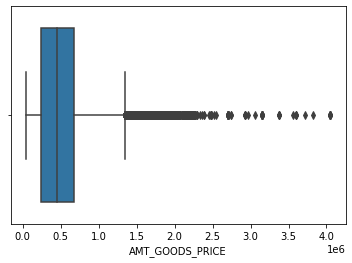

In [49]:
sns.boxplot(application.AMT_GOODS_PRICE)
plt.show()

We can impute the null values as median of __'AMT_GOODS_PRICE'__ column as it will have the price of the goods for which the loan is given for, so we can take the middle value 

In [50]:
# get the median value
goods_price_median = application.AMT_GOODS_PRICE.median()
goods_price_median

450000.0

In [51]:
# Imputing the 'AMT_GOODS_PRICE' by median value
application.AMT_GOODS_PRICE.fillna(goods_price_median, inplace=True)

In [52]:
# rechecking null value count
application.AMT_GOODS_PRICE.isnull().sum()

0

In [53]:
# check the spread of AMT_GOODS_PRICE column
application.AMT_GOODS_PRICE.describe()

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

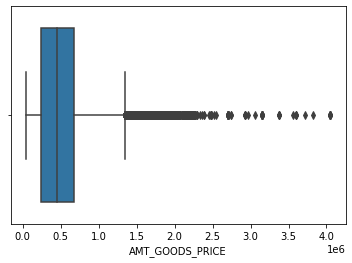

In [54]:
sns.boxplot(application.AMT_GOODS_PRICE)
plt.show()

Handling missing values in **'AMT_ANNUITY'** column

In [55]:
# check the null count
application.AMT_ANNUITY.isnull().sum()

12

In [56]:
# check the spread of 'AMT_ANNUITY'
application.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

We can also impute the null values as median for __'AMT_ANNUITY'__ column.

In [57]:
# get the median value
amt_annuity_median = application.AMT_ANNUITY.median()
amt_annuity_median

24903.0

In [58]:
# Imputing the 'AMT_ANNUITY' by median value
application.AMT_ANNUITY.fillna(amt_annuity_median, inplace=True)

In [59]:
# recheck the null count
application.AMT_ANNUITY.isnull().sum()

0

In [60]:
# check the spread of 'AMT_ANNUITY'
application.AMT_ANNUITY.describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

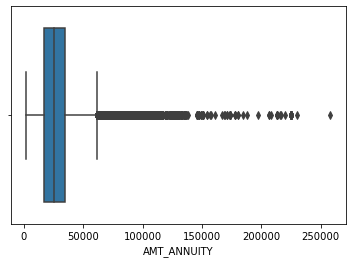

In [61]:
sns.boxplot(application.AMT_ANNUITY)
plt.show()

Handling data in __CNT_FAM_MEMBERS__ and __DAYS_LAST_PHONE_CHANGE__ column

In [62]:
# check null value count in CNT_FAM_MEMBERS columns
application.CNT_FAM_MEMBERS.isnull().sum()

2

In [63]:
# check data
application.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

Impute the null value with mode value in 'CNT_FAM_MEMBERS' column as the null value count is very less

In [64]:
# get mode value
family_member_mode = float(application.CNT_FAM_MEMBERS.mode())
family_member_mode

2.0

In [65]:
# Imputing the 'CNT_FAM_MEMBERS' by mode value
application.CNT_FAM_MEMBERS.fillna(family_member_mode, inplace=True)

In [66]:
# check null value count in CNT_FAM_MEMBERS columns
application.CNT_FAM_MEMBERS.isnull().sum()

0

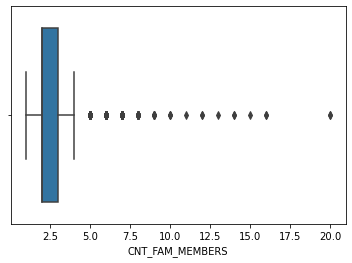

In [67]:
# check the 'CNT_FAM_MEMBERS' column
sns.boxplot(application.CNT_FAM_MEMBERS)
plt.show()

In [68]:
# check null value count in DAYS_LAST_PHONE_CHANGE column
application.DAYS_LAST_PHONE_CHANGE.isnull().sum()

1

In [69]:
# check data
application.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

Similarly, impute the null value with mode value in 'DAYS_LAST_PHONE_CHANGE' column as the null value count is very less

In [70]:
# get mode value
days_phn_change_mode = float(application.DAYS_LAST_PHONE_CHANGE.mode())
days_phn_change_mode

0.0

In [71]:
# Imputing the 'DAYS_LAST_PHONE_CHANGE' by mode value
application.DAYS_LAST_PHONE_CHANGE.fillna(family_member_mode, inplace=True)

In [72]:
# check null value count in DAYS_LAST_PHONE_CHANGE columns
application.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

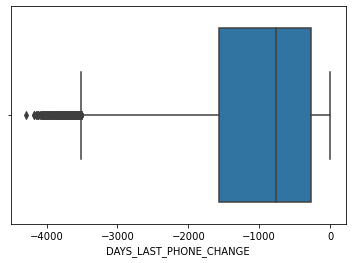

In [73]:
# check the 'DAYS_LAST_PHONE_CHANGE' column
sns.boxplot(application.DAYS_LAST_PHONE_CHANGE)
plt.show()

In [74]:
application.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

- ### **Fixing the rows and columns**

In [75]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [76]:
application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,Unknown,1.0,2,2,MONDAY,8,0,0,0,0,0,0,X

In [77]:
# checking the Gender column
application.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [78]:
# we have some 'XNA' values in gender column, maybe they don't want to disclose their gender, hence we can impute these values with the mode value.
gender_mode = application.CODE_GENDER.mode()
gender_mode[0]

'F'

In [79]:
# imputing the 'XNA' values with mode value
application.loc[application.CODE_GENDER == 'XNA', 'CODE_GENDER'] = gender_mode[0]

In [80]:
# rechecking the values in Gender column
application.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

The days count columns are all in negetive numbers, so let's change those values to positive numbers.
- DAYS_BIRTH
- DAYS_EMPLOYED
- DAYS_REGISTRATION
- DAYS_ID_PUBLISH
- DAYS_LAST_PHONE_CHANGE

In [81]:
application[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0
...,...,...,...,...,...
307506,-9327,-236,-8456.0,-1982,-273.0
307507,-20775,365243,-4388.0,-4090,0.0
307508,-14966,-7921,-6737.0,-5150,-1909.0
307509,-11961,-4786,-2562.0,-931,-322.0


In [82]:
# converting negetive numbers to positive.
application.DAYS_BIRTH = application.DAYS_BIRTH.abs()
application.DAYS_EMPLOYED = application.DAYS_EMPLOYED.abs()
application.DAYS_REGISTRATION = application.DAYS_REGISTRATION.abs()
application.DAYS_ID_PUBLISH = application.DAYS_ID_PUBLISH.abs()
application.DAYS_LAST_PHONE_CHANGE = application.DAYS_LAST_PHONE_CHANGE.abs()

In [83]:
application[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0
...,...,...,...,...,...
307506,9327,236,8456.0,1982,273.0
307507,20775,365243,4388.0,4090,0.0
307508,14966,7921,6737.0,5150,1909.0
307509,11961,4786,2562.0,931,322.0


We can use the column **DAYS_BIRTH** to find out the age of the clients. So, let us create a new column **AGE**.

In [84]:
application['AGE'] = application['DAYS_BIRTH'].apply(lambda x: round(x/365))

In [85]:
#checking AGE column
application.AGE.head()

0    26
1    46
2    52
3    52
4    55
Name: AGE, dtype: int64

We can also use the column **DAYS_EMPLOYED** to find out the years of employment. So, let us create a new column **EMPLOYMENT_YEARS**.

In [86]:
application['EMPLOYMENT_YEARS'] = application['DAYS_EMPLOYED'].apply(lambda x: round(x/365))

In [87]:
#checking EMPLOYMENT_YEARS column
application.EMPLOYMENT_YEARS.head()

0    2
1    3
2    1
3    8
4    8
Name: EMPLOYMENT_YEARS, dtype: int64

In [88]:
# Now the dataset seems okay. Hence, we can go ahead with analysis
application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,EMPLOYMENT_YEARS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,8
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,9327,236,8456.0,1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,26,1
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,20775,365243,4388.0,4090,1,0,0,1,1,0,Unknown,1.0,

- ### **Handling Outliers**

In [89]:
# checking the AMT_INCOME_TOTAL column
application.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

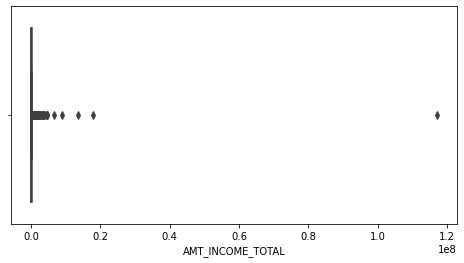

In [90]:
# let's check the spread of the data in AMT_INCOME_TOTAL column
plt.figure(figsize=[8,4])
sns.boxplot(application.AMT_INCOME_TOTAL)
plt.show()

In [91]:
print('Median value of amount total income : ', application.AMT_INCOME_TOTAL.median())
print('Maximum value of amount total income: ', application.AMT_INCOME_TOTAL.max())
print('Mimimun value of amount total income: ', application.AMT_INCOME_TOTAL.min())

Median value of amount total income :  147150.0
Maximum value of amount total income:  117000000.0
Mimimun value of amount total income:  25650.0


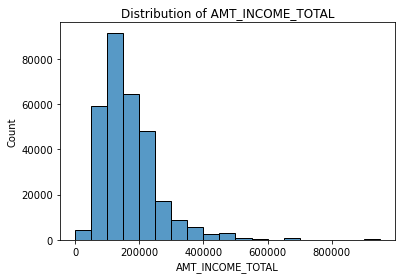

In [92]:
# check the distribution
bins=[i for i in range(0,1000000,50000)]
plt.title('Distribution of AMT_INCOME_TOTAL')
sns.histplot(application.AMT_INCOME_TOTAL,bins=bins)
plt.show()

- We can see that maximum applicants has a amount income total of around 50,000-225,000 which clearly indicates that 117,000,000 is an outlier. But, that does not imply that the data is wrong, big company or individual can have a income of 117,000,000. So, we can bin the AMT_INCOME_TOTAL and create a new column AMT_INCOME_TOTAL_TYPE.

In [93]:
# create a column AMT_INCOME_TOTAL_TYPE
application['AMT_INCOME_TOTAL_TYPE'] = pd.cut(application.AMT_INCOME_TOTAL, [0,100000,300000,600000,1000000,900000000], labels=['VERY LOW','LOW','MEDIUM','HIGH','VERY HIGH'])

In [94]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,EMPLOYMENT_YEARS,AMT_INCOME_TOTAL_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,LOW
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,LOW
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,VERY LOW
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,8,LOW
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,LOW


In [95]:
# checking the AMT_CREDIT column
application.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

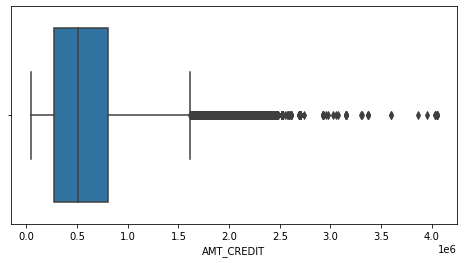

In [96]:
# let's check the spread of the data in AMT_CREDIT column
plt.figure(figsize=[8,4])
sns.boxplot(application.AMT_CREDIT)
plt.show()

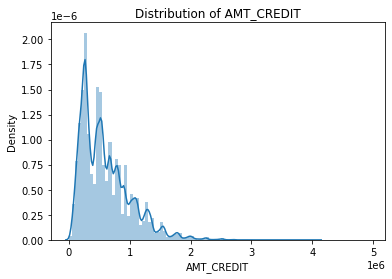

In [97]:
# check the distribution of data in AMT_CREDIT column
bins=[i for i in range(0,5000000,50000)]
plt.title('Distribution of AMT_CREDIT')
sns.distplot(application.AMT_CREDIT, bins=bins)
plt.show()

In [98]:
print('Median value of credit amount : ', application.AMT_CREDIT.median())
print('Maximum value of credit amount: ', application.AMT_CREDIT.max())
print('Mimimun value of credit amount: ', application.AMT_CREDIT.min())

Median value of credit amount :  513531.0
Maximum value of credit amount:  4050000.0
Mimimun value of credit amount:  45000.0


- We can observe that values are more or less continuous in AMT_CREDIT. Maximum credit amount is 4,050,000, so clearly it can be treated as an outlier, but the value is not wrong as credit amount of 4,050,000 loan is a valid value.

In [99]:
# checking the AMT_ANNUITY column
application.AMT_ANNUITY.describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

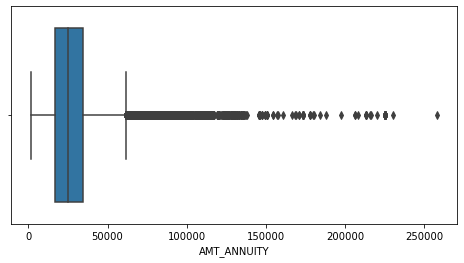

In [100]:
# let's check the spread of the data in AMT_ANNUITY column
plt.figure(figsize=[8,4])
sns.boxplot(application.AMT_ANNUITY)
plt.show()

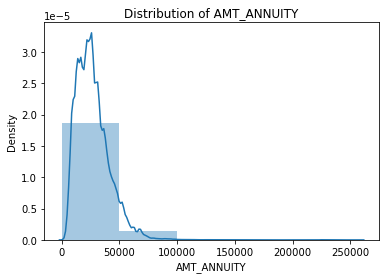

In [101]:
# check the distribution of data in AMT_ANNUITY column
bins=[i for i in range(0,300000,50000)]
plt.title('Distribution of AMT_ANNUITY')
sns.distplot(application.AMT_ANNUITY, bins=bins)
plt.show()

- We can observe that majority people repays a loan between 0-50,000 and clearly a loan of 258,025.50 can be treated as an outlier, so he also we can go for the same approach of binning the annuity amount.

In [102]:
# create a column AMT_ANNUITY_TYPE
application['AMT_ANNUITY_TYPE'] = pd.cut(application.AMT_ANNUITY, [0,50000,100000,300000], labels=['LOW ANNUITY','MEDIUM ANNUITY','HIGH ANNUITY'])

In [103]:
# checking count of childrens (CNT_CHILDREN) column
application.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [104]:
# check the median of the count of children
application.CNT_CHILDREN.median()

0.0

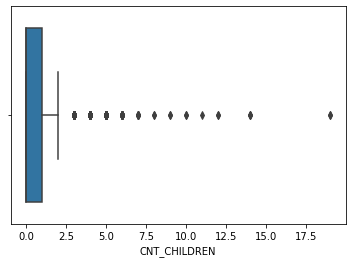

In [105]:
# check the spread
sns.boxplot(application.CNT_CHILDREN)
plt.show()

In __CNT_CHILDREN__ column, Median of the count of childrens is __0__ and the maximum children count is __19__ which is clearly an outlier. Hence, we need to analyse the column based on maximum count of childrens before the outliers. 

In [106]:
# checking count of family members (CNT_FAM_MEMBERS) column
application.CNT_FAM_MEMBERS.describe()

count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [107]:
# check the median of the family members
application.CNT_FAM_MEMBERS.median()

2.0

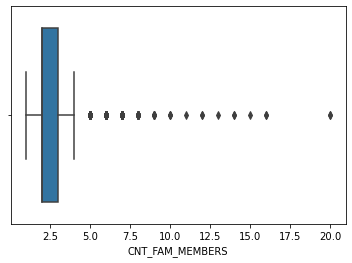

In [108]:
# check the spread
sns.boxplot(application.CNT_FAM_MEMBERS)
plt.show()

In __CNT_FAM_MEMBERS__ column, Median of the count of family members is __2__ but the maximum family member count is __20__ which is clearly an outlier. Hence, we need to analyse the column based on maximum count of family members before the outliers.

In [109]:
# checking AGE column
application.AGE.describe()

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

We can observe that 50% of the clients are within age **34 - 54**

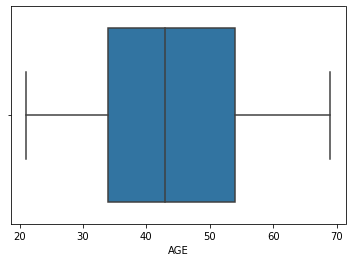

In [110]:
# checking outliers AGE column
sns.boxplot(application.AGE)
plt.show()

Clearly no outliers are present for the __AGE__ column.

In [111]:
# checking EMPLOYMENT_YEARS
application.EMPLOYMENT_YEARS.describe()

count    307511.000000
mean        185.608021
std         382.165887
min           0.000000
25%           3.000000
50%           6.000000
75%          16.000000
max        1001.000000
Name: EMPLOYMENT_YEARS, dtype: float64

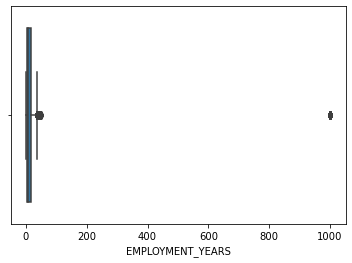

In [112]:
# checking outliers EMPLOYMENT_YEARS
sns.boxplot(application.EMPLOYMENT_YEARS)
plt.show()

In [113]:
application.EMPLOYMENT_YEARS.value_counts()

1001    55374
1       34796
2       30530
3       27721
4       22933
5       19191
6       15372
7       14080
8       12381
9        9971
0        9752
10       8299
11       6483
12       5621
13       4770
14       4500
15       3916
16       2352
17       2232
18       1914
19       1851
20       1798
21       1510
22       1401
23       1100
24        950
25        862
26        727
28        656
27        638
29        567
30        512
31        439
32        390
34        355
33        352
35        300
36        207
37        174
38        128
39        122
40         82
41         66
42         44
43         31
45         27
44         20
46          7
48          4
47          2
49          1
Name: EMPLOYMENT_YEARS, dtype: int64

We can see that in EMPLOYMENT_YEARS, some clients have employment years of **1001** and that is why the mean employment years is approx 185 years, clearly that is an outlier. We can impute the data with median value of employment years.

In [114]:
employment_years = application.EMPLOYMENT_YEARS.median()
employment_years

6.0

In [115]:
# imputing the employment years of '1001' values with median value
application.loc[application.EMPLOYMENT_YEARS == 1001, 'EMPLOYMENT_YEARS'] = employment_years

In [116]:
# checking EMPLOYMENT_YEARS
application.EMPLOYMENT_YEARS.describe()

count    307511.000000
mean          6.436771
std           5.809292
min           0.000000
25%           3.000000
50%           6.000000
75%           8.000000
max          49.000000
Name: EMPLOYMENT_YEARS, dtype: float64

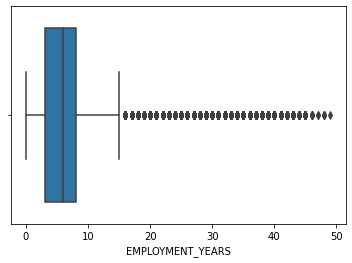

In [117]:
# checking outliers EMPLOYMENT_YEARS
sns.boxplot(application.EMPLOYMENT_YEARS)
plt.show()

Now, we can see that the EMPLOYMENT_YEARS column data is continuous and the interquartile range lies between **3 - 8**.

In [118]:
application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,EMPLOYMENT_YEARS,AMT_INCOME_TOTAL_TYPE,AMT_ANNUITY_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,LOW,LOW ANNUITY
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,LOW,LOW ANNUITY
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,VERY LOW,LOW ANNUITY
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,8,LOW,LOW ANNUITY
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,LOW,LOW ANNUITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,9327,236,8456.0,1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,26,1,LOW,LOW ANNUITY
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001

- ### **Data Imbalance**

In [119]:
# Cheking the TARGET column, where 1 - client with payment difficulties and 0 - client without payment difficulties
target_variable_imbalance = application["TARGET"].value_counts(normalize=True)*100
target_variable_imbalance

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

- We can observe, that almost __92%__ of people/applicants do not have payment difficulties but remaining __8%__ of people/applicants have payment difficulties.

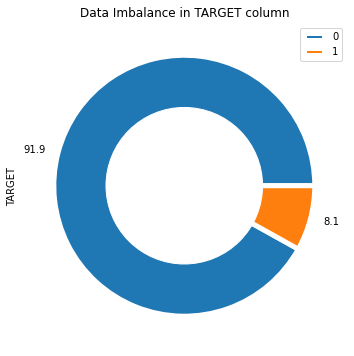

In [120]:
# let's visualise the imbalance
plt.figure(figsize=[6,6])
labels = target_variable_imbalance.values.round(decimals=1)
application["TARGET"].value_counts(normalize=True).plot.pie(labels=labels, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.6, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

# Adding legend
legends = target_variable_imbalance.index
plt.legend(legends, loc="upper right")

# Adding Title of chart
plt.title('Data Imbalance in TARGET column')
plt.show()

- ### **Segmented Univariate Analysis**

**Dividing the dataset into two different datasets based upon 'Target' values, 0 and 1.**

In [121]:
# creating new datasets
target0=application[application["TARGET"]==0]
target1=application[application["TARGET"]==1]

In [122]:
# checking the target column in dataset with TARGET value 0
target0.TARGET.value_counts()

0    282686
Name: TARGET, dtype: int64

In [123]:
target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,EMPLOYMENT_YEARS,AMT_INCOME_TOTAL_TYPE,AMT_ANNUITY_TYPE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,LOW,LOW ANNUITY
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,VERY LOW,LOW ANNUITY
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,8,LOW,LOW ANNUITY
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,LOW,LOW ANNUITY
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46,4,VERY LOW,LOW ANNUITY


In [124]:
# checking the target column in dataset with TARGET value 1
target1.TARGET.value_counts()

1    24825
Name: TARGET, dtype: int64

In [125]:
target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,EMPLOYMENT_YEARS,AMT_INCOME_TOTAL_TYPE,AMT_ANNUITY_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,LOW,LOW ANNUITY
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573.0,1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,51,7,LOW,LOW ANNUITY
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,48,3,LOW,LOW ANNUITY
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45.0,4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,37,10,LOW,LOW ANNUITY
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,5391.0,4199,1,0,0,1,0,0,Unknown,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,68,6,VERY LOW,LOW ANNUITY


**Comparing the Income Total Type of client with payment difficulties and client without payment difficulties**

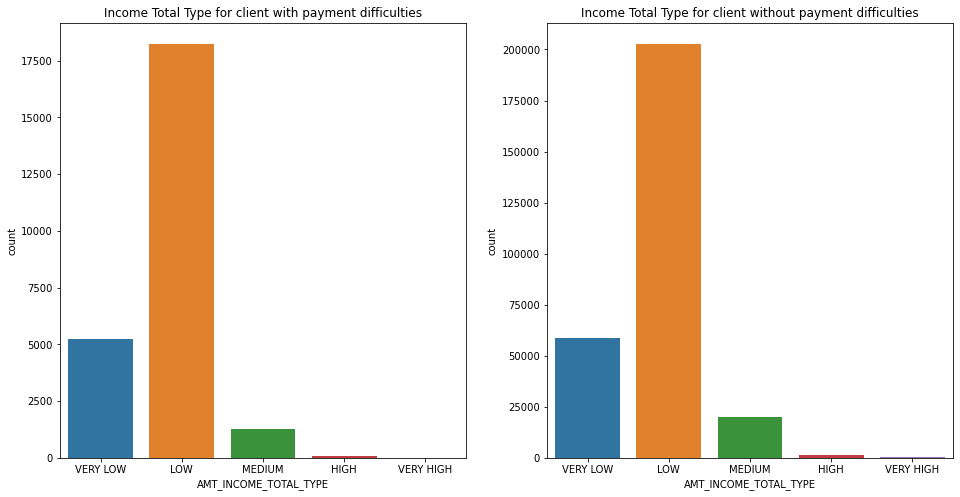

In [126]:
# plotting Income Total Type for client with payment difficulties and client without payment difficulties in subplots
plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.countplot(x = target1['AMT_INCOME_TOTAL_TYPE'], data = target1)
plt.title('Income Total Type for client with payment difficulties')

plt.subplot(1,2,2)
sns.countplot(x = target0['AMT_INCOME_TOTAL_TYPE'], data = target0)
plt.title('Income Total Type for client without payment difficulties')
plt.show()


**Observation-** We can see that clients with very high income has no difficulty regarding the payments of the loan, whereas clients with lower income has difficulty regarding the payments of the loan.

**Comparing the Credit amount type of the loan of client with payment difficulties and client without payment difficulties**

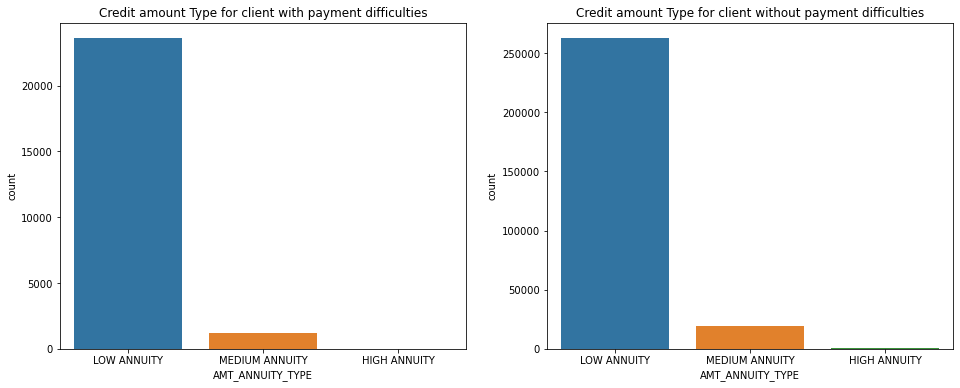

In [127]:
# plotting Credit amount type of the loan for client with payment difficulties and client without payment difficulties in subplots
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
sns.countplot(x = target1['AMT_ANNUITY_TYPE'], data = target1)
plt.title('Credit amount Type for client with payment difficulties')

plt.subplot(1,2,2)
sns.countplot(x = target0['AMT_ANNUITY_TYPE'], data = target0)
plt.title('Credit amount Type for client without payment difficulties')
plt.show()


**Observation-** We can see that clients with very high credit amount has no difficulty regarding the payments of the loan, whereas clients with low/medium credit amount has difficulty regarding the payments of the loan. That means if a higher amount of loan is taken by the client, in those cases the payment difficulties are less.

**Comparing the Clients income type (businessman, working, maternity leave,…) of client with payment difficulties and client without payment difficulties**

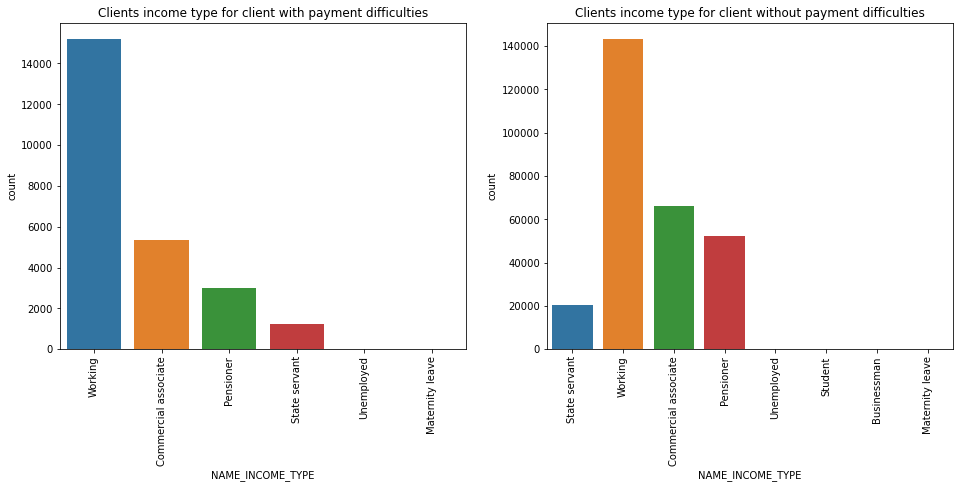

In [128]:
# plotting Clients income type (businessman, working, maternity leave,…) with payment difficulties and client without payment difficulties in subplots
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
sns.countplot(x = target1['NAME_INCOME_TYPE'], data = target1)
plt.title('Clients income type for client with payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x = target0['NAME_INCOME_TYPE'], data = target0)
plt.title('Clients income type for client without payment difficulties')
plt.xticks(rotation=90)

plt.show()

**Observation-**<br>
1. Students and Businessman don't have any difficulties in the payment.
2. Pensioner, Commercial Associate and State servants have a better chance of paying the loan without difficulty.
3. For Working, Unemployed and Maternity leave clients other variables should be taken into account before approving the loan, as they have a 50-50 chance with payment difficulties.

**Comparing the Level of highest education the client achieved with payment difficulties and client without payment difficulties**

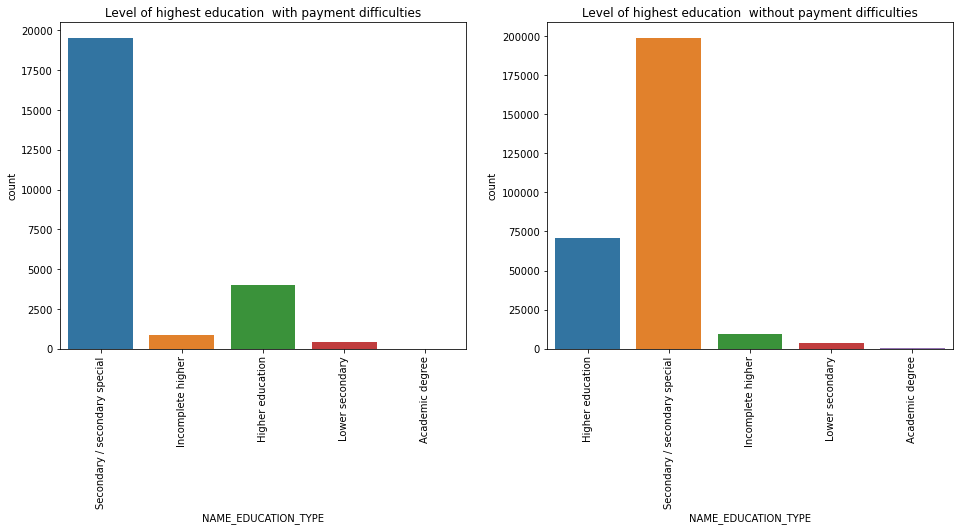

In [129]:
# plotting Level of highest education the client achieved with payment difficulties and client without payment difficulties in subplots
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
sns.countplot(x = target1['NAME_EDUCATION_TYPE'], data = target1)
plt.title('Level of highest education  with payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x = target0['NAME_EDUCATION_TYPE'], data = target0)
plt.title('Level of highest education  without payment difficulties')
plt.xticks(rotation=90)

plt.show()

**Observation-**
1. Clients with Academic degree and Higher education have less difficulty in payments
2. Oher education levels have higher chances of difficulty in payments

In [130]:
application.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

**Comparing the Family status of the client with payment difficulties and client without payment difficulties**

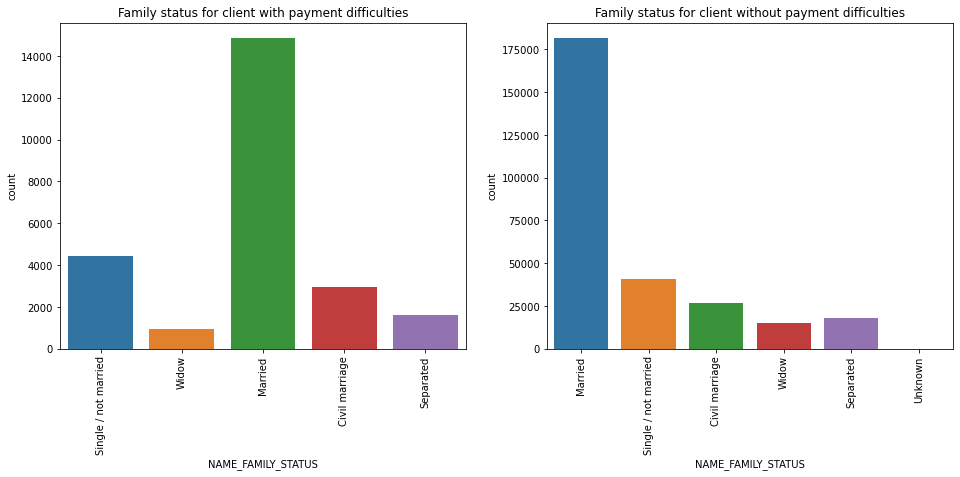

In [131]:
# plotting Level of family status the client achieved with payment difficulties and client without payment difficulties in subplots
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
sns.countplot(x = target1['NAME_FAMILY_STATUS'], data = target1)
plt.title('Family status for client with payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x = target0['NAME_FAMILY_STATUS'], data = target0)
plt.title('Family status for client without payment difficulties')
plt.xticks(rotation=90)

plt.show()

In [132]:
fam_status_per_t1 = target1.NAME_FAMILY_STATUS.value_counts(normalize=True)*100
fam_status_per_t0 = target0.NAME_FAMILY_STATUS.value_counts(normalize=True)*100

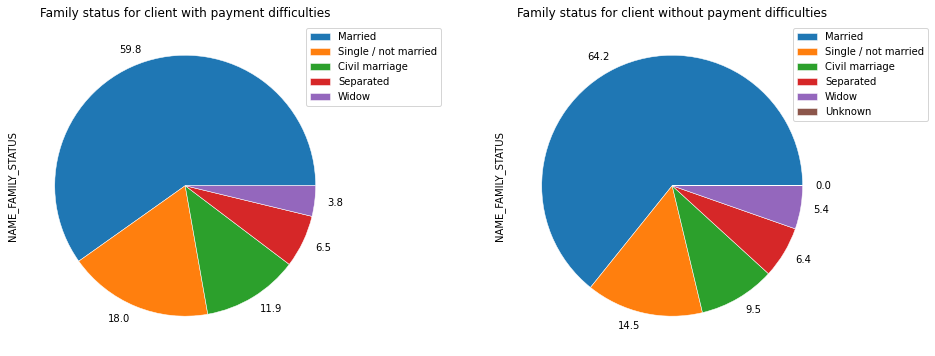

In [133]:
# checking the percentage of each family status
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
labels1 = fam_status_per_t1.values.round(decimals=1)
target1["NAME_FAMILY_STATUS"].value_counts(normalize=True).plot.pie(labels=labels1, wedgeprops = { 'linewidth' : 0.5, 'edgecolor' : 'white' })
legends1 = fam_status_per_t1.index
plt.legend(legends1, loc="upper right", bbox_to_anchor=(1.3,1))
plt.title('Family status for client with payment difficulties')

plt.subplot(1,2,2)
labels0 = fam_status_per_t0.values.round(decimals=1)
target0["NAME_FAMILY_STATUS"].value_counts(normalize=True).plot.pie(labels=labels0, wedgeprops = { 'linewidth' : 0.5, 'edgecolor' : 'white' })
legends0 = fam_status_per_t0.index
plt.legend(legends0, loc="upper right", bbox_to_anchor=(1.3,1))
plt.title('Family status for client without payment difficulties')

plt.show()

This shows a much clear view that client from which Family status are more likely to have payment difficulties rather than who don't have payment difficulties.
- We can see, Married clients have a better chance of not having difficulties for payments rather than having difficulties, as 64.2% of Married clients don't have payment difficulties whereas 59.8% have payment difficulties.

**Comparing the housing situation of the client (renting, living with parents, ...) of the client with payment difficulties and client without payment difficulties**

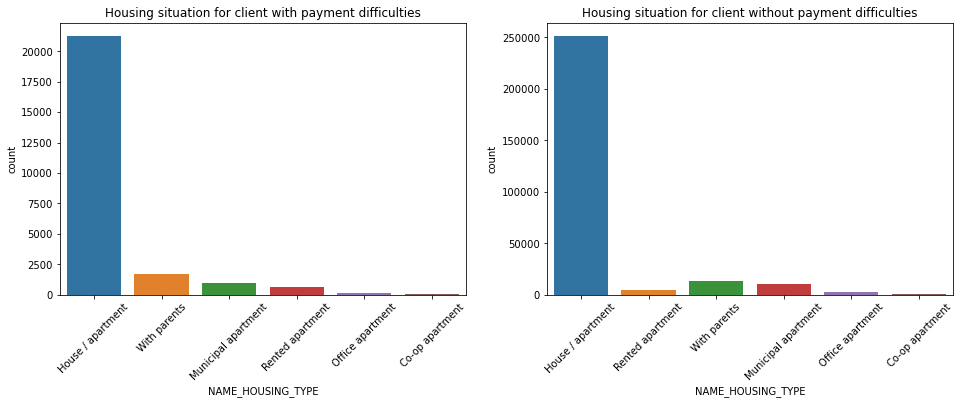

In [134]:
# plotting the housing situation of the client (renting, living with parents, ...) of the client with payment difficulties and client without payment difficulties in subplots
plt.figure(figsize=[16,5])

plt.subplot(1,2,1)
sns.countplot(x = target1['NAME_HOUSING_TYPE'], data = target1)
plt.title('Housing situation for client with payment difficulties')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(x = target0['NAME_HOUSING_TYPE'], data = target0)
plt.title('Housing situation for client without payment difficulties')
plt.xticks(rotation=45)

plt.show()

**Observation-** We can see that clients who live in rented apartments or live with parents are more likely to have payment difficulties.

**Comparing the occupation of the client have with payment difficulties and client without payment difficulties**

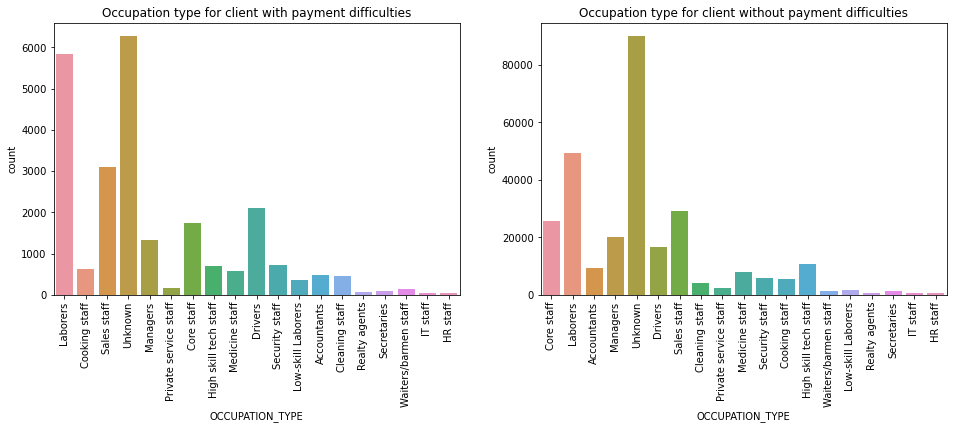

In [135]:
# plotting the occupation of the client with payment difficulties and client without payment difficulties in subplots
plt.figure(figsize=[16,5])

plt.subplot(1,2,1)
sns.countplot(x = target1['OCCUPATION_TYPE'], data = target1)
plt.title('Occupation type for client with payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x = target0['OCCUPATION_TYPE'], data = target0)
plt.title('Occupation type for client without payment difficulties')
plt.xticks(rotation=90)

plt.show()

**Observation-** We can observe, 
1. Labourers, Drivers, Low-skill labourers, Cooking staff, Cleaning staff are more likely to have payment difficulties.
2. Accountants, Managers, IT-staff, HR-staffs are less likely to have payment difficulties<br>
As, Labourers and staffs earn less they have more payment difficulties rather than Accountants or Managers who earn more and have less payment difficulties.

**Now, we can compare clients from which age group have payment difficulties and which age group don't have payment difficulties**

In [136]:
application.AGE.value_counts()

39    9023
38    8793
37    8727
40    8602
41    8495
28    8467
32    8313
42    8308
43    8265
36    8152
44    8132
31    8021
30    7776
35    7751
33    7729
34    7659
29    7636
54    7489
45    7385
46    7333
47    7202
55    7140
53    7124
57    6926
48    6907
49    6786
52    6740
50    6696
56    6657
60    6612
59    6479
51    6417
27    6413
58    6371
61    5795
63    5467
62    5362
64    5023
26    4364
65    4318
25    4079
24    3815
23    3669
66    2641
22    1990
67    1834
68    1654
21     660
69     314
Name: AGE, dtype: int64

In [137]:
# creating buckets for age group - <30, 30-40, 40-50 50-60 and 60+ from age column for target0 dataset.
target0['AGE_GROUP'] = pd.cut(target0.AGE, [0,30,40,50,60,999], labels=['<30','30-40','40-50','50-60','60+'])

In [138]:
target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,EMPLOYMENT_YEARS,AMT_INCOME_TOTAL_TYPE,AMT_ANNUITY_TYPE,AGE_GROUP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,LOW,LOW ANNUITY,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,VERY LOW,LOW ANNUITY,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,8,LOW,LOW ANNUITY,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,LOW,LOW ANNUITY,50-60
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46,4,VERY LOW,LOW ANNUITY,40-50


In [139]:
# creating buckets for age group - <30, 30-40, 40-50 50-60 and 60+ from age column for target1 dataset.
target1['AGE_GROUP'] = pd.cut(target1.AGE, [0,30,40,50,60,999], labels=['<30','30-40','40-50','50-60','60+'])

In [140]:
target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,EMPLOYMENT_YEARS,AMT_INCOME_TOTAL_TYPE,AMT_ANNUITY_TYPE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,LOW,LOW ANNUITY,<30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573.0,1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,51,7,LOW,LOW ANNUITY,50-60
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,48,3,LOW,LOW ANNUITY,40-50
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45.0,4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,37,10,LOW,LOW ANNUITY,30-40
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,5391.0,4199,1,0,0,1,0,0,Unknown,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,68,6,VERY LOW,LOW ANNUITY,60+


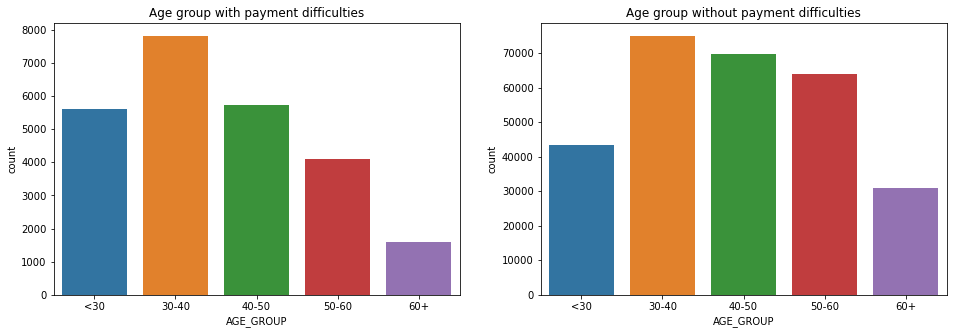

In [141]:
# plotting the age_group client with payment difficulties and client without payment difficulties in subplots
plt.figure(figsize=[16,5])

plt.subplot(1,2,1)
sns.countplot(x = target1['AGE_GROUP'], data = target1)
plt.title('Age group with payment difficulties')
#plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x = target0['AGE_GROUP'], data = target0)
plt.title('Age group without payment difficulties')
#plt.xticks(rotation=90)

plt.show()

**Observation-** From this we can understand, 
1. age group of __less than 30__ and __30-40__ has more difficulties to pay the loans
2. age group of __40-50__, __50-60__ and __60+__ has less difficulties to pay the loans

**Comparing clients Years of employement with payment difficulties and not having payment difficulties**

In [142]:
# As EMPLOYMENT_YEARS is numeric continuous data we can check by its distribution

# get the Inter-quartile range of target0 (without difficulties to pay) .
emp_yrs_Q1 = target0.EMPLOYMENT_YEARS.quantile(0.25)
emp_yrs_Q3 = target0.EMPLOYMENT_YEARS.quantile(0.75)
IQR = emp_yrs_Q3 - emp_yrs_Q1
print(IQR)

5.0


In [143]:
# get the maximum value after which outlier exists
max_value0 = emp_yrs_Q3 + 1.5 * IQR
max_value0

15.5

In [144]:
# get the Inter-quartile range of target0 (with difficulties to pay) .
emp_yrs_Q1 = target1.EMPLOYMENT_YEARS.quantile(0.25)
emp_yrs_Q3 = target1.EMPLOYMENT_YEARS.quantile(0.75)
IQR = emp_yrs_Q3 - emp_yrs_Q1
print(IQR)

4.0


In [145]:
# get the maximum value after which outlier exists
max_value1 = emp_yrs_Q3 + 1.5 * IQR
max_value1

12.0

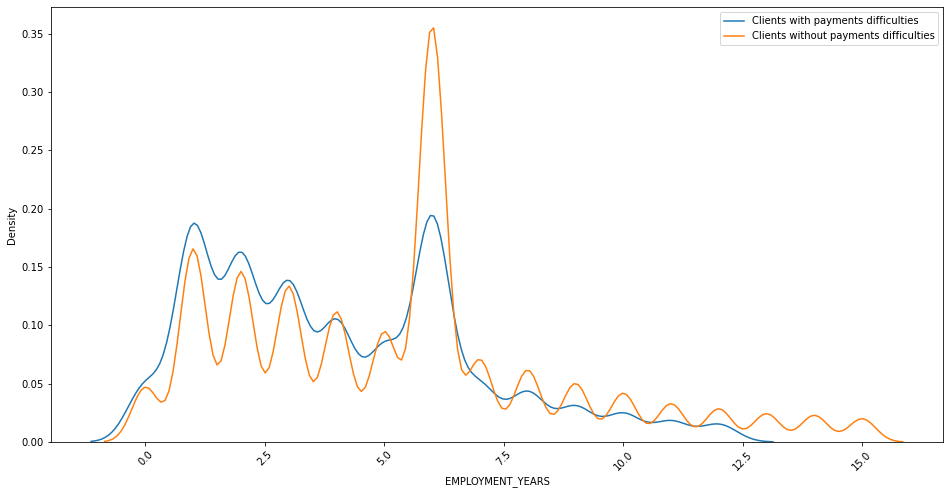

In [146]:
# plotting the distribution of the employment years for clients with and without payment difficulties
plt.figure(figsize = [16,8])

sns.distplot(target1[target1.EMPLOYMENT_YEARS <= max_value1].EMPLOYMENT_YEARS , label='Clients with payments difficulties', hist=False)

sns.distplot(target0[target0.EMPLOYMENT_YEARS <= max_value0].EMPLOYMENT_YEARS , label='Clients without payments difficulties', hist=False)

plt.xticks(rotation = 45)
plt.legend()
plt.show()

**Observation-** We can observe, clients who are employed more number of years do not face payment difficulties, whereas clients who are employed less number of years faces payment difficulties. Clients having years of employment as __1-7 years__ are more likely to face payment difficulties. 

In [147]:
application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,EMPLOYMENT_YEARS,AMT_INCOME_TOTAL_TYPE,AMT_ANNUITY_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,LOW,LOW ANNUITY
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,LOW,LOW ANNUITY
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,VERY LOW,LOW ANNUITY
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,8,LOW,LOW ANNUITY
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,LOW,LOW ANNUITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,9327,236,8456.0,1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,26,1,LOW,LOW ANNUITY
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001

- ### Bivariate / Multivariate Analysis

**Total Income(AMT_INCOME_TOTAL) VS Credit Amount(AMT_CREDIT) for clients with difficulty in payments and without difficulty in payments**

In [148]:
# check the max value without outliers in target0 dataset for AMT_INCOME_TOTAL
max_amt_total0 = target0.AMT_INCOME_TOTAL.quantile(0.75) + 1.5 * (target0.AMT_INCOME_TOTAL.quantile(0.75)-target0.AMT_INCOME_TOTAL.quantile(0.25))

# check the max value without outliers in target0 dataset for AMT_CREDIT
max_amt_credit0 = target0.AMT_CREDIT.quantile(0.75) + 1.5 * (target0.AMT_CREDIT.quantile(0.75)-target0.AMT_CREDIT.quantile(0.25))

In [149]:
# check the max value without outliers in target1 dataset for AMT_INCOME_TOTAL
max_amt_total1 = target1.AMT_INCOME_TOTAL.quantile(0.75) + 1.5 * (target1.AMT_INCOME_TOTAL.quantile(0.75)-target1.AMT_INCOME_TOTAL.quantile(0.25))

# check the max value without outliers in target0 dataset for AMT_CREDIT
max_amt_credit1 = target1.AMT_CREDIT.quantile(0.75) + 1.5 * (target1.AMT_CREDIT.quantile(0.75)-target1.AMT_CREDIT.quantile(0.25))

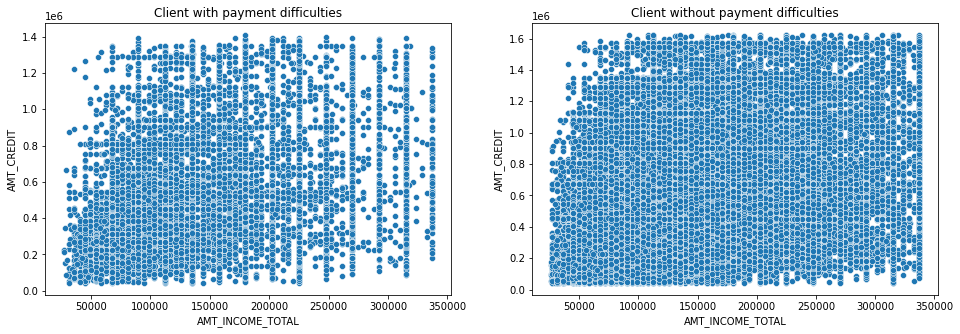

In [150]:
# plotting a scatter plot to check the corelation between AMT_INCOME_TOTAL and AMT_CREDIT.
plt.figure(figsize=[16,5])

plt.subplot(1,2,1)
sns.scatterplot(x=target1[target1.AMT_INCOME_TOTAL <= max_amt_total1].AMT_INCOME_TOTAL, y=target1[target1.AMT_CREDIT <= max_amt_credit1].AMT_CREDIT)
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)
sns.scatterplot(x=target0[target0.AMT_INCOME_TOTAL <= max_amt_total0].AMT_INCOME_TOTAL, y=target0[target0.AMT_CREDIT <= max_amt_credit0].AMT_CREDIT)
plt.title('Client without payment difficulties')

plt.show()


**Observation-** We can see that total income has a strong relation with the credit amount. But, how does strongly it corelates with one another that is not very clear.

**Price of the goods(AMT_GOODS_PRICE) VS Credit Amount(AMT_CREDIT) for clients with difficulty in payments and without difficulty in payments**


In [151]:
# check the max value without outliers in target0 dataset for AMT_GOODS_PRICE
max_amt_goods0 = target0.AMT_GOODS_PRICE.quantile(0.75) + 1.5 * (target0.AMT_GOODS_PRICE.quantile(0.75)-target0.AMT_GOODS_PRICE.quantile(0.25))

# check the max value without outliers in target0 dataset for AMT_CREDIT
max_amt_credit0 = target0.AMT_CREDIT.quantile(0.75) + 1.5 * (target0.AMT_CREDIT.quantile(0.75)-target0.AMT_CREDIT.quantile(0.25))

In [152]:
# check the max value without outliers in target1 dataset for AMT_GOODS_PRICE
max_amt_goods1 = target1.AMT_GOODS_PRICE.quantile(0.75) + 1.5 * (target1.AMT_GOODS_PRICE.quantile(0.75)-target1.AMT_GOODS_PRICE.quantile(0.25))

# check the max value without outliers in target0 dataset for AMT_CREDIT
max_amt_credit1 = target1.AMT_CREDIT.quantile(0.75) + 1.5 * (target1.AMT_CREDIT.quantile(0.75)-target1.AMT_CREDIT.quantile(0.25))

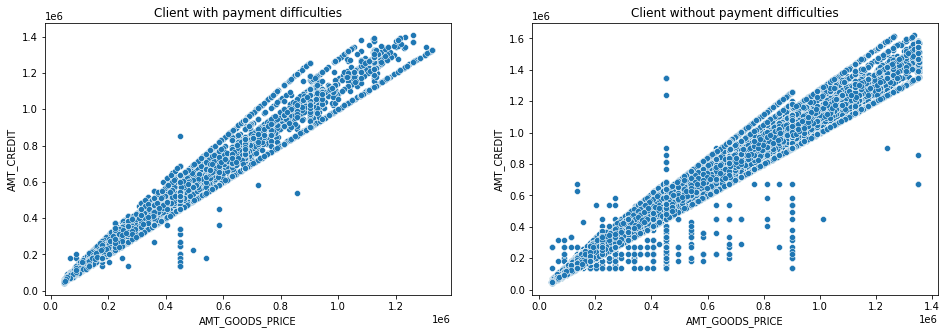

In [153]:
# plotting a scatter plot to check the corelation between AMT_GOODS_PRICE and AMT_CREDIT.
plt.figure(figsize=[16,5])

plt.subplot(1,2,1)
sns.scatterplot(x=target1[target1.AMT_GOODS_PRICE <= max_amt_goods1].AMT_GOODS_PRICE, y=target1[target1.AMT_CREDIT <= max_amt_credit1].AMT_CREDIT)
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)
sns.scatterplot(x=target0[target0.AMT_GOODS_PRICE <= max_amt_goods0].AMT_GOODS_PRICE, y=target0[target0.AMT_CREDIT <= max_amt_credit0].AMT_CREDIT)
plt.title('Client without payment difficulties')

plt.show()

**Observation-** We can see that Price of the goods has a strong positive correlation with the credit amount. This means that if price of the goods increases then the credit amount also increases and vice-versa.

**Loan annuity(AMT_ANNUITY) VS Credit Amount(AMT_CREDIT) for clients with difficulty in payments and without difficulty in payments**

In [154]:
# check the max value without outliers in target0 dataset for AMT_ANNUITY
max_annuity0 = target0.AMT_ANNUITY.quantile(0.75) + 1.5 * (target0.AMT_ANNUITY.quantile(0.75)-target0.AMT_ANNUITY.quantile(0.25))

# check the max value without outliers in target0 dataset for AMT_CREDIT
max_amt_credit0 = target0.AMT_CREDIT.quantile(0.75) + 1.5 * (target0.AMT_CREDIT.quantile(0.75)-target0.AMT_CREDIT.quantile(0.25))

In [155]:
# check the max value without outliers in target0 dataset for AMT_ANNUITY
max_annuity1 = target1.AMT_ANNUITY.quantile(0.75) + 1.5 * (target1.AMT_ANNUITY.quantile(0.75)-target1.AMT_ANNUITY.quantile(0.25))

# check the max value without outliers in target0 dataset for AMT_CREDIT
max_amt_credit1 = target1.AMT_CREDIT.quantile(0.75) + 1.5 * (target1.AMT_CREDIT.quantile(0.75)-target1.AMT_CREDIT.quantile(0.25))

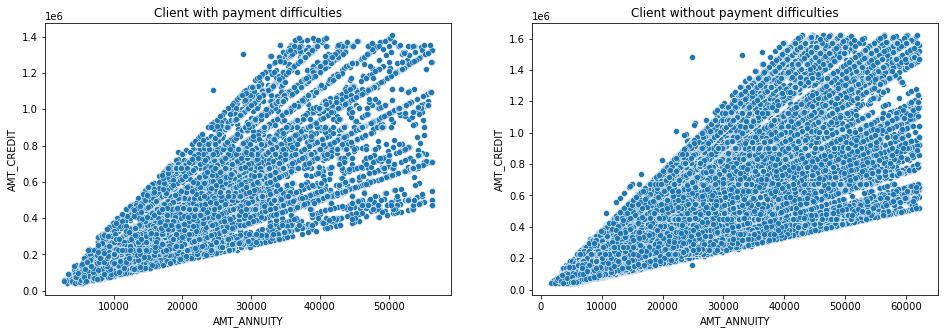

In [156]:
# plotting a scatter plot to check the corelation between AMT_ANNUITY and AMT_CREDIT.
plt.figure(figsize=[16,5])

plt.subplot(1,2,1)
sns.scatterplot(x=target1[target1.AMT_ANNUITY <= max_annuity1].AMT_ANNUITY, y=target1[target1.AMT_CREDIT <= max_amt_credit1].AMT_CREDIT)
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)
sns.scatterplot(x=target0[target0.AMT_ANNUITY <= max_annuity0].AMT_ANNUITY, y=target0[target0.AMT_CREDIT <= max_amt_credit0].AMT_CREDIT)
plt.title('Client without payment difficulties')

plt.show()

**Observation-** We can see that there is a very strong positive correlation between Loan annuity and Credit amount, as credit amount increases the annuity also increases. Large loans will have large annuity and smaller loans will have smaller annuity.

Let us check how the __AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY and AMT_GOODS_PRICE__ are co-relating among themselves.

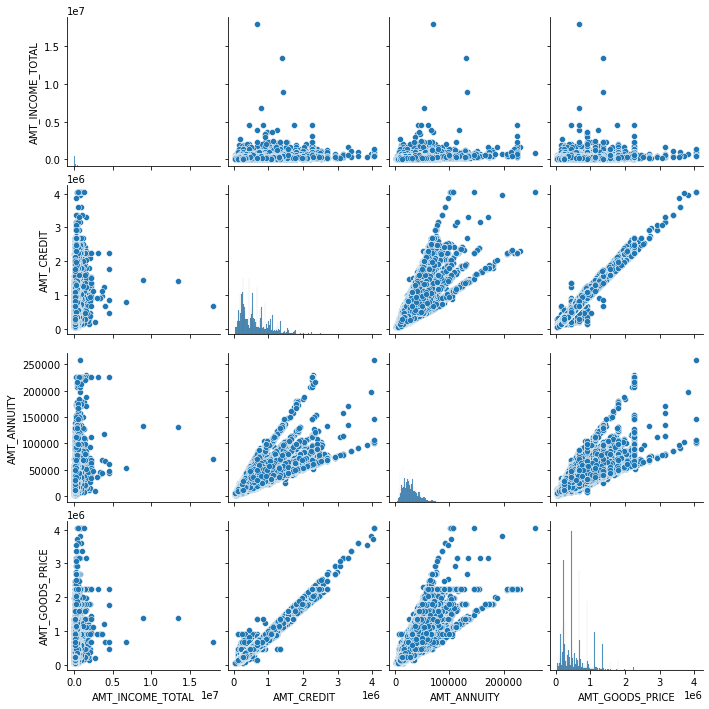

In [157]:
# let us plot a pair plot to check how the columns are  co-relating in target0 dataset
sns.pairplot(data=target0, vars=["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"])
plt.show()

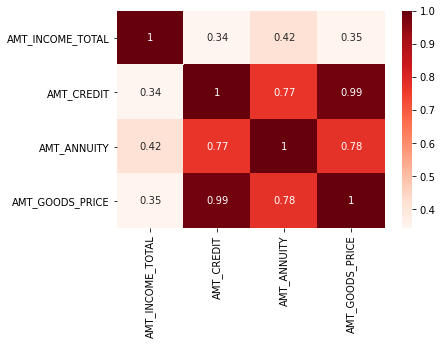

In [158]:
# correlation heat map
sns.heatmap(target0[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]].corr(), annot=True, cmap='Reds')
plt.show()

**Observation-** We can see AMT_CREDIT, AMT_ANNUITY and AMT_GOODS_PRICE have a high correlation among themselves. And, AMT_INCOME_TOTAL have a quite low co-relation with others. So we can conclude that Total Income of a Client who don't have difficulties in repaying the loan, for them their income do not have much effect on the amount of loan received.

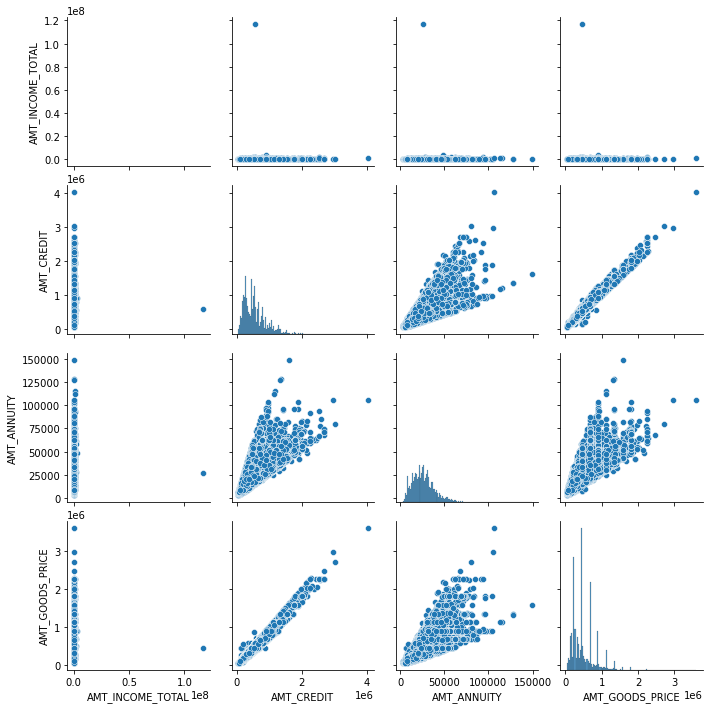

In [159]:
# let us plot a pair plot to check how the columns are  co-relating in target1 dataset
sns.pairplot(data=target1, vars=["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"])
plt.show()

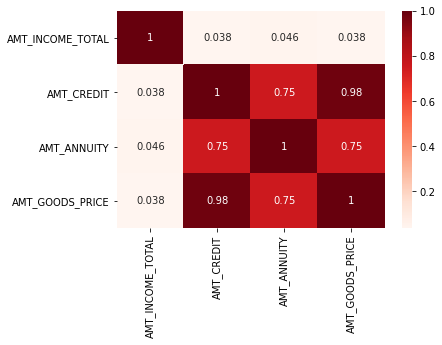

In [160]:
# correlation heat map
sns.heatmap(target1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]].corr(), annot=True, cmap='Reds')
plt.show()

**Observation-** We can see AMT_CREDIT, AMT_ANNUITY and AMT_GOODS_PRICE have a high correlation among themselves. And, AMT_INCOME_TOTAL have a quite low co-relation with others.Total income does not much effect on loan received for clients with payment difficulties. But, the Total Income has a little higher correlation with others where the clients have payment difficulties.

**Checking how client Income Type (like businessman, working, maternity leave,…) gets Loan Credit on basis of their Income Total**

In [161]:
#creating a pivot table NAME_INCOME_TYPE vs AMT_INCOME_TOTAL_TYPE vs AMT_CREDIT for target0 dataset
result_income0 = pd.pivot_table(data=target0, index='NAME_INCOME_TYPE', columns="AMT_INCOME_TOTAL_TYPE", values="AMT_CREDIT")
result_income0

AMT_INCOME_TOTAL_TYPE,VERY LOW,LOW,MEDIUM,HIGH,VERY HIGH
NAME_INCOME_TYPE,,,,,
Businessman,NaN,911250.000000,1.125000e+06,1.680000e+06,1.350000e+06
Commercial associate,3.958880e+05,655519.136502,9.651979e+05,1.182187e+06,1.260121e+06
Maternity leave,3.150000e+05,810000.000000,7.650000e+05,NaN,NaN
Pensioner,3.763451e+05,613459.553131,1.024259e+06,1.240001e+06,1.239730e+06
State servant,4.304026e+05,686298.000902,9.909380e+05,1.235370e+06,1.126100e+06
Student,4.288440e+05,532688.785714,4.500000e+05,NaN,NaN
Unemployed,1.126929e+06,555000.000000,5.850000e+05,NaN,NaN
Working,3.844108e+05,608852.631375,9.107762e+05,1.070001e+06,9.955831e+05


In [162]:
#creating a pivot table NAME_INCOME_TYPE vs AMT_INCOME_TOTAL_TYPE vs AMT_CREDIT for target1 dataset
result_income1 = pd.pivot_table(data=target1, index='NAME_INCOME_TYPE', columns="AMT_INCOME_TOTAL_TYPE", values="AMT_CREDIT")
result_income1

AMT_INCOME_TOTAL_TYPE,VERY LOW,LOW,MEDIUM,HIGH,VERY HIGH
NAME_INCOME_TYPE,,,,,
Commercial associate,392272.725232,600869.486444,900031.589463,1.045801e+06,970051.5
Maternity leave,929250.000000,NaN,NaN,NaN,NaN
Pensioner,434061.882692,610482.512668,927998.523529,2.250000e+05,1097491.5
State servant,435548.009881,643509.830619,880079.197183,5.513220e+05,900000.0
Unemployed,660857.142857,387000.000000,NaN,NaN,NaN
Working,388796.369240,563248.707707,790991.555105,9.005048e+05,852768.0


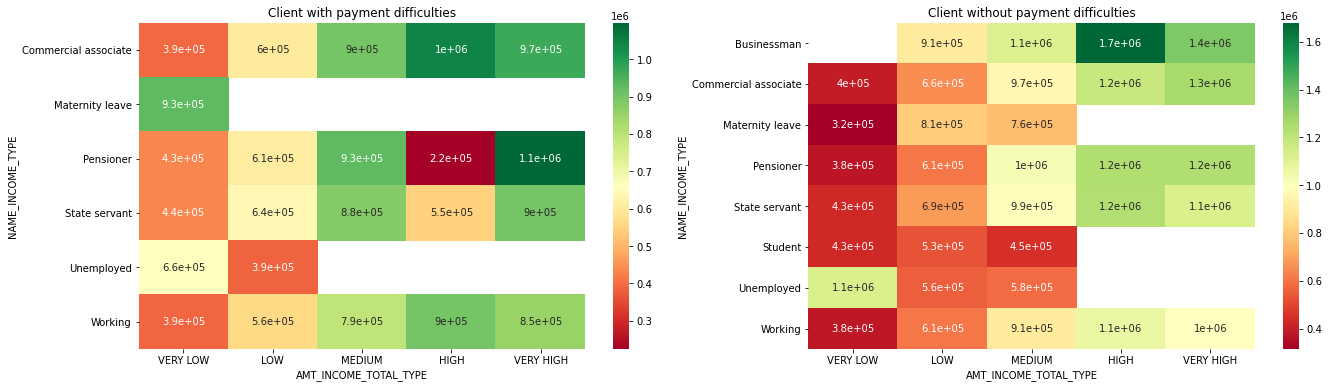

In [163]:
# plot a heatmap to check
plt.figure(figsize=[22,6])

plt.subplot(1,2,1)
sns.heatmap(result_income1, annot=True, cmap="RdYlGn")
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)
sns.heatmap(result_income0, annot=True, cmap="RdYlGn")
plt.title('Client without payment difficulties')

plt.show()

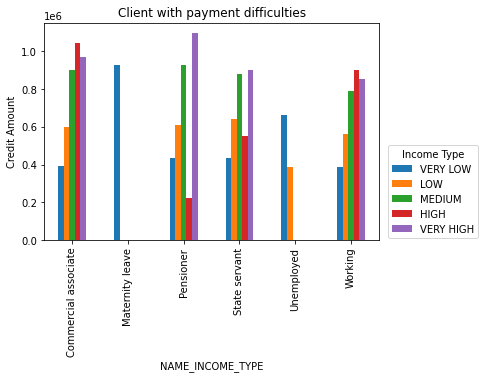

In [164]:
# plotting bar chart for Client with payment difficulties 
result_income1.plot.bar()
plt.title('Client with payment difficulties')
plt.ylabel("Credit Amount")
plt.legend(bbox_to_anchor=(1.31,0.46), title= 'Income Type')
plt.show()

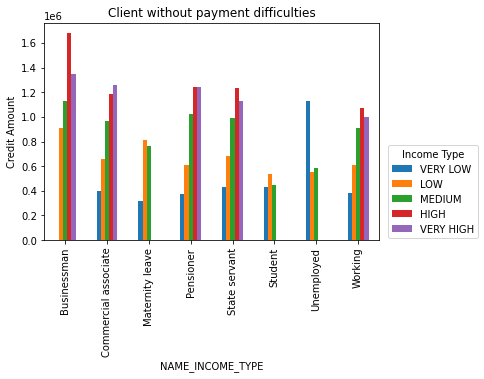

In [165]:
# plotting bar chart for Client without payment difficulties 
result_income0.plot.bar()
plt.title('Client without payment difficulties')
plt.ylabel("Credit Amount")
plt.legend(bbox_to_anchor=(1.31,0.46), title= 'Income Type')
plt.show()

**Observation-**  We can see that,
1. Clients who have payment difficulty, if they have "VERY_LOW" Income then they get less Loan credit. Pensioners who have moderate Income gets least Loan Credit, whereas if Pensioners have a high Income gets most Loan Credit.
2. Clients who don't have payment difficulty, if they have "VERY LOW" Income gets less Loan Credit. Businessman who has a "HIGH" Income gets most Loan Credit, whereas clients who are on Maternity leave and have "VERY LOW" Income gets the least Loan Credit.

**Checking which age group gets how much Loan Credit on basis of their Income Total**

In [166]:
#creating a pivot table AGE_GROUP vs AMT_INCOME_TOTAL_TYPE vs AMT_CREDIT for target0 dataset
result_age0 = pd.pivot_table(data=target0, index='AGE_GROUP', columns="AMT_INCOME_TOTAL_TYPE", values="AMT_CREDIT")
result_age0

AMT_INCOME_TOTAL_TYPE,VERY LOW,LOW,MEDIUM,HIGH,VERY HIGH
AGE_GROUP,,,,,
<30,319780.700249,510455.878493,8.067380e+05,1.016497e+06,8.757008e+05
30-40,388388.292078,620040.646140,9.188901e+05,1.133583e+06,1.167438e+06
40-50,422333.066774,675183.343933,9.786030e+05,1.165604e+06,1.264722e+06
50-60,420699.082691,683084.917122,1.024629e+06,1.208317e+06,1.278193e+06
60+,347643.716979,583276.329238,9.894922e+05,1.292571e+06,6.638970e+05


In [167]:
#creating a pivot table AGE_GROUP vs AMT_INCOME_TOTAL_TYPE vs AMT_CREDIT for target1 dataset
result_age1 = pd.pivot_table(data=target1, index='AGE_GROUP', columns="AMT_INCOME_TOTAL_TYPE", values="AMT_CREDIT")
result_age1

AMT_INCOME_TOTAL_TYPE,VERY LOW,LOW,MEDIUM,HIGH,VERY HIGH
AGE_GROUP,,,,,
<30,328629.535714,484342.355790,774424.491713,1.069396e+06,NaN
30-40,393923.333671,575504.990790,830622.820946,1.124852e+06,1050584.4
40-50,444570.795564,623762.631338,861011.908861,7.846767e+05,862903.5
50-60,438173.790000,656164.387639,923571.250000,1.067443e+06,553806.0
60+,438017.092721,605284.436988,839117.925000,8.437500e+05,1097491.5


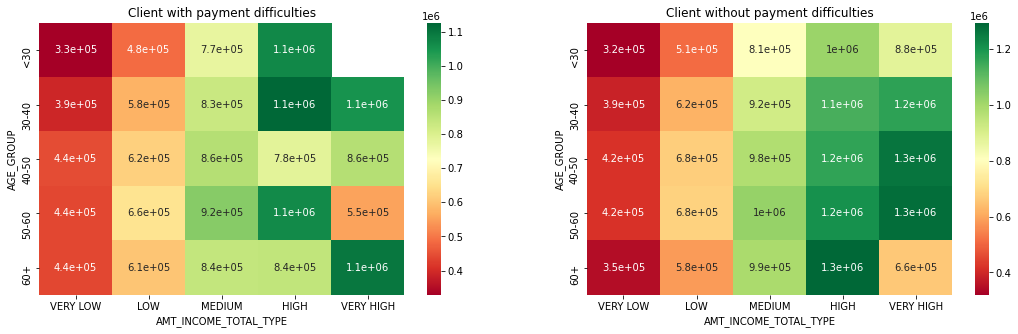

In [168]:
# plot a heatmap to check
plt.figure(figsize=[18,5])

plt.subplot(1,2,1)
sns.heatmap(result_age1, annot=True, cmap="RdYlGn")
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)
sns.heatmap(result_age0, annot=True, cmap="RdYlGn")
plt.title('Client without payment difficulties')

plt.show()

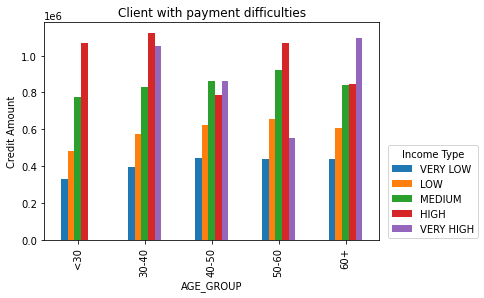

In [169]:
# plotting bar chart for Client with payment difficulties 
result_age1.plot.bar()
plt.title('Client with payment difficulties')
plt.ylabel("Credit Amount")
plt.legend(bbox_to_anchor=(1.31,0.46), title= 'Income Type')
plt.show()

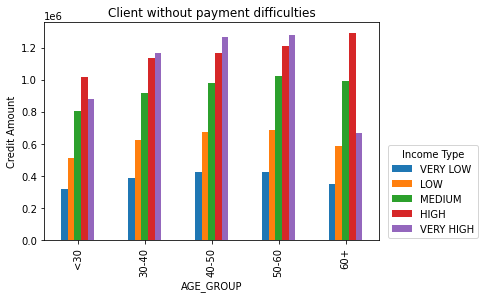

In [170]:
# plotting bar chart for Client without payment difficulties 
result_age0.plot.bar()
plt.title('Client without payment difficulties')
plt.ylabel("Credit Amount")
plt.legend(bbox_to_anchor=(1.31,0.46), title= 'Income Type')
plt.show()

**Observation-** 
1. Clients who have difficulty in payments, if their age is less than 30 and has very low Income gets least loan credit, whereas if their age is between 30-40 and Income is high then they get more loan credit.
2. Clients who don't have difficulty in payments, if their age is less than 30 or more than 60 and has very low Income gets least loan credit  but clients who are  in age group of 40-50, 50-60 or more than 60 and have a high Income gets more loan credit.

**Checking clients family type and how much Loan Credit they get on basis of their Income Total**

In [171]:
#creating a pivot table NAME_FAMILY_STATUS vs AMT_INCOME_TOTAL_TYPE vs AMT_CREDIT for target0 dataset
result_family0 = pd.pivot_table(data=target0, index='NAME_FAMILY_STATUS', columns="AMT_INCOME_TOTAL_TYPE", values="AMT_CREDIT")
result_family0

AMT_INCOME_TOTAL_TYPE,VERY LOW,LOW,MEDIUM,HIGH,VERY HIGH
NAME_FAMILY_STATUS,,,,,
Civil marriage,332617.733096,563685.176968,918013.583521,1.042126e+06,9.776488e+05
Married,425178.652478,672198.158283,976641.755477,1.169118e+06,1.187054e+06
Separated,321543.196157,572697.291528,934422.861822,1.177955e+06,1.409323e+06
Single / not married,303095.537798,524302.938244,853916.785714,1.144693e+06,1.102243e+06
Unknown,NaN,585000.000000,675000.000000,NaN,NaN
Widow,313278.408860,547851.751366,933196.517613,1.108640e+06,1.029146e+06


In [172]:
#creating a pivot table NAME_FAMILY_STATUS vs AMT_INCOME_TOTAL_TYPE vs AMT_CREDIT for target1 dataset
result_family1 = pd.pivot_table(data=target1, index='NAME_FAMILY_STATUS', columns="AMT_INCOME_TOTAL_TYPE", values="AMT_CREDIT")
result_family1

AMT_INCOME_TOTAL_TYPE,VERY LOW,LOW,MEDIUM,HIGH,VERY HIGH
NAME_FAMILY_STATUS,,,,,
Civil marriage,351227.725131,527645.748000,786666.357692,1.028498e+06,615772.5
Married,438170.982271,622749.396817,864437.482630,9.475517e+05,1023432.3
Separated,357338.344406,539043.562193,860293.444954,9.249540e+05,NaN
Single / not married,319690.630286,498517.633284,805902.450739,9.693350e+05,NaN
Widow,375706.972826,570251.623223,919634.142857,NaN,NaN


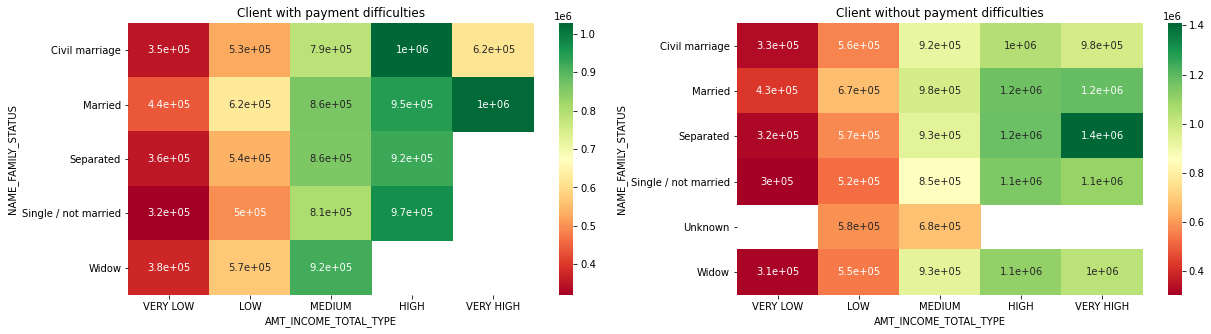

In [173]:
# plot a heatmap to check
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sns.heatmap(result_family1, annot=True, cmap="RdYlGn")
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)
sns.heatmap(result_family0, annot=True, cmap="RdYlGn")
plt.title('Client without payment difficulties')

plt.show()

**Observation-** 
1. Clients who have difficulty in payments, if their Income is very low then they get least loan credit, whereas if their family status is either civil marriage or married and Income is high then they get more loan credit.
2. Clients who don't have difficulty in payments, if their Income is very low then they get least loan credit, whereas if their family status is seperated with very high Income then they get big amount of loan credit.

**Checking clients occupation type and how much Loan Credit they get on basis of their Income Total**

In [174]:
#creating a pivot table OCCUPATION_TYPE vs AMT_INCOME_TOTAL_TYPE vs AMT_CREDIT for target0 dataset
result_occup0 = pd.pivot_table(data=target0, index='OCCUPATION_TYPE', columns="AMT_INCOME_TOTAL_TYPE", values="AMT_CREDIT")
result_occup0

AMT_INCOME_TOTAL_TYPE,VERY LOW,LOW,MEDIUM,HIGH,VERY HIGH
OCCUPATION_TYPE,,,,,
Accountants,410298.111810,703514.856636,1.035074e+06,1.181875e+06,1.200165e+06
Cleaning staff,375005.630493,584017.445797,8.789542e+05,1.078200e+06,5.450400e+05
Cooking staff,393348.800808,602113.471290,8.173633e+05,NaN,NaN
Core staff,396823.260226,643513.056850,9.704490e+05,1.199738e+06,9.076140e+05
Drivers,378413.640659,617033.243936,8.670539e+05,9.304533e+05,9.568680e+05
HR staff,415311.962264,667860.918886,1.050254e+06,1.028565e+06,NaN
High skill tech staff,400895.565375,653820.095414,9.314931e+05,1.143315e+06,1.090594e+06
IT staff,307629.778846,643580.630312,8.529109e+05,1.068908e+06,1.288350e+06
Laborers,379100.861108,597535.716033,8.739229e+05,1.091488e+06,7.828005e+05


In [175]:
#creating a pivot table OCCUPATION_TYPE vs AMT_INCOME_TOTAL_TYPE vs AMT_CREDIT for target1 dataset
result_occup1 = pd.pivot_table(data=target1, index='OCCUPATION_TYPE', columns="AMT_INCOME_TOTAL_TYPE", values="AMT_CREDIT")
result_occup1

AMT_INCOME_TOTAL_TYPE,VERY LOW,LOW,MEDIUM,HIGH,VERY HIGH
OCCUPATION_TYPE,,,,,
Accountants,428508.525000,676507.126005,8.925063e+05,NaN,NaN
Cleaning staff,386768.923729,535152.216730,5.695005e+05,2.547000e+05,NaN
Cooking staff,401064.096059,550935.862408,5.489971e+05,NaN,NaN
Core staff,400467.420485,615506.382979,8.366894e+05,4.182896e+05,957978.00
Drivers,381394.621827,564960.247738,7.853018e+05,8.821005e+05,491211.00
HR staff,344944.800000,645830.678571,1.333023e+06,NaN,NaN
High skill tech staff,405116.662500,598844.388785,1.069266e+06,1.135505e+06,553806.00
IT staff,716634.000000,516149.826923,1.290000e+06,NaN,NaN
Laborers,384413.299401,553815.322682,7.681116e+05,1.211840e+06,466868.25


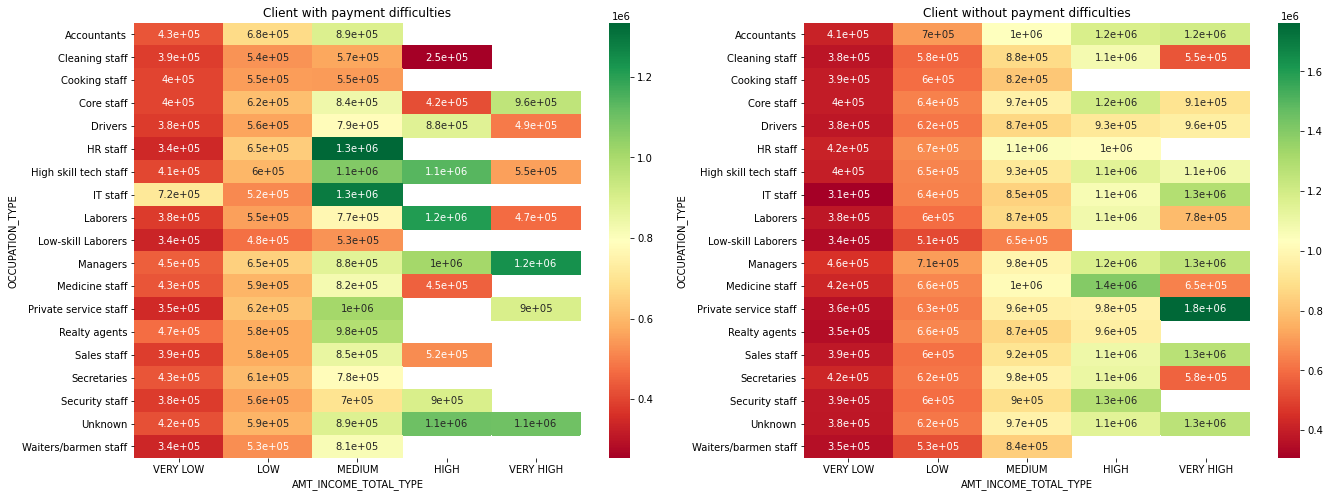

In [176]:
# plot a heatmap to check
plt.figure(figsize=[22,8])

plt.subplot(1,2,1)
sns.heatmap(result_occup1, annot=True, cmap="RdYlGn")
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)
sns.heatmap(result_occup0, annot=True, cmap="RdYlGn")
plt.title('Client without payment difficulties')

plt.show()

**Observation-** 
We can see how according to different occupation and Income levels the loan credit is given to clients with payment difficulties and clients without payment difficulties. If income is low then loan credit is also low.

- ## Analysis of the previous application dataset

In [177]:
prev_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
# check the columns and its datatype
prev_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [179]:
# check the null count
prev_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [180]:
# checking null percentage
prev_application.isnull().sum()/len(prev_application)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

**Let's drop the columns with more than 40% null data**


In [181]:
# get the name of columns
prev_application_columns = prev_application.columns.to_list()
print("Columns in application dataset: ", len(prev_application_columns))
prev_application_columns

Columns in application dataset:  37


['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [182]:
# method to get null value percentage of a column in previous application
def null_percentage_prev_application(col):
    null_percentage = (prev_application[col].isnull().sum()/prev_application[col].shape[0])*100
    return round(null_percentage, 2)

In [183]:
# drop the columns in previous applications with more than 40% null values
for col in prev_application_columns:
    if null_percentage_prev_application(col)>40.0:
        prev_application.drop([col], axis=1, inplace=True)
    else:
        pass

In [184]:
# checking the previous application dataset after dropping columns which have more than 40% null values
prev_application.shape

(1670214, 26)

In [185]:
# checking the numerical columns of previous application
prev_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


In [186]:
# recheck the null percentage after dropping the columns
prev_application_null_perc = prev_application.isnull().sum()/len(prev_application)*100
prev_application_null_perc.sort_values(ascending=False).head(50)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

- ### Let us merge the two dataset and create a new dataset

In [187]:
# let's merge previous application with application based on SK_ID_CURR as Key
application_data_merge = pd.merge(prev_application, application[["SK_ID_CURR"]],on="SK_ID_CURR",how="inner")

In [188]:
application_data_merge

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,1800000.0,SATURDAY,18,Y,1,XAP,Refused,-472,Cash through the bank,SCO,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,108400.5,SUNDAY,14,Y,1,XAP,Approved,-548,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,196,Furniture,12.0,middle,POS industry with interest
3,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
4,1536272,108129,Cash loans,21709.125,450000.0,512370.0,450000.0,WEDNESDAY,9,Y,1,XNA,Approved,-515,XNA,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,1261221,277978,Consumer loans,6030.675,133866.0,133866.0,133866.0,SATURDAY,15,Y,1,XAP,Approved,-832,Cash through the bank,XAP,New,Consumer Electronics,POS,XNA,Regional / Local,200,Consumer electronics,24.0,low_action,POS household without interest
1413697,1563733,227766,Consumer loans,13726.080,137250.0,123525.0,137250.0,SATURDAY,14,Y,1,XAP,Approved,-495,Cash through the bank,XAP,New,Audio/Video,POS,XNA,Stone,154,Consumer electronics,10.0,low_normal,POS household with interest
1413698,2319569,239799,Consumer loans,4716.495,46800.0,46800.0,46800.0,FRIDAY,9,Y,1,XAP,Approved,-160,Cash through the bank,XAP,New,Construction Materials,POS,XNA,Regional / Local,50,Construction,12.0,middle,POS industry with interest
1413699,2829648,353284,Consumer loans,10301.940,101745.0,112491.0,101745.0,FRIDAY,12,Y,1,XAP,Approved,-560,Cash through the bank,XAP,New,Consumer Electronics,POS,XNA,Regional / Local,140,Consumer electronics,12.0,low_action,POS household without interest


**There are some "XAP" and "XNA" values present in some columns, let's change those values to "NaN"(null values)**

In [189]:
application_data_merge=application_data_merge.replace('XNA', np.NaN)
application_data_merge=application_data_merge.replace('XAP', np.NaN)

In [190]:
application_data_merge

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,NaN,Approved,-73,Cash through the bank,NaN,Repeater,Mobile,POS,NaN,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,1800000.0,SATURDAY,18,Y,1,NaN,Refused,-472,Cash through the bank,SCO,Repeater,Clothing and Accessories,POS,NaN,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,108400.5,SUNDAY,14,Y,1,NaN,Approved,-548,Cash through the bank,NaN,New,Furniture,POS,NaN,Stone,196,Furniture,12.0,middle,POS industry with interest
3,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,NaN,Approved,-164,NaN,NaN,Repeater,NaN,Cash,x-sell,Contact center,-1,NaN,36.0,low_action,Cash X-Sell: low
4,1536272,108129,Cash loans,21709.125,450000.0,512370.0,450000.0,WEDNESDAY,9,Y,1,NaN,Approved,-515,NaN,NaN,Repeater,NaN,Cash,x-sell,AP+ (Cash loan),6,NaN,36.0,low_normal,Cash X-Sell: low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,1261221,277978,Consumer loans,6030.675,133866.0,133866.0,133866.0,SATURDAY,15,Y,1,NaN,Approved,-832,Cash through the bank,NaN,New,Consumer Electronics,POS,NaN,Regional / Local,200,Consumer electronics,24.0,low_action,POS household without interest
1413697,1563733,227766,Consumer loans,13726.080,137250.0,123525.0,137250.0,SATURDAY,14,Y,1,NaN,Approved,-495,Cash through the bank,NaN,New,Audio/Video,POS,NaN,Stone,154,Consumer electronics,10.0,low_normal,POS household with interest
1413698,2319569,239799,Consumer loans,4716.495,46800.0,46800.0,46800.0,FRIDAY,9,Y,1,NaN,Approved,-160,Cash through the bank,NaN,New,Construction Materials,POS,NaN,Regional / Local,50,Construction,12.0,middle,POS industry with interest
1413699,2829648,353284,Consumer loans,10301.940,101745.0,112491.0,101745.0,FRIDAY,12,Y,1,NaN,Approved,-560,Cash through the bank,NaN,New,Consumer Electronics,POS,NaN,Regional / Local,140,Consumer electronics,12.0,low_action,POS household without interest


In [191]:
application_data_merge.isnull().sum()/len(application_data_merge)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.022140
AMT_ANNUITY                    21.731469
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000071
AMT_GOODS_PRICE                22.602021
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE         95.797343
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE              36.992264
CODE_REJECT_REASON             81.340467
NAME_CLIENT_TYPE                0.109146
NAME_GOODS_CATEGORY            56.391627
NAME_PORTFOLIO                 21.731116
NAME_PRODUCT_TYPE              63.666433
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY           50.599243
CNT_PAYMENT                    21.731116
NAME_YIELD_GROUP

**There are some null values present after replacing "XAP" and "XNA" values from columns** 

- ### Let's do some Univariate Analysis on previous data

**Let's check Contract product type (Cash loan, consumer loan etc.)**

In [192]:
# check the values count
application_data_merge.NAME_CONTRACT_TYPE.value_counts()

Cash loans         626764
Consumer loans     625256
Revolving loans    161368
Name: NAME_CONTRACT_TYPE, dtype: int64

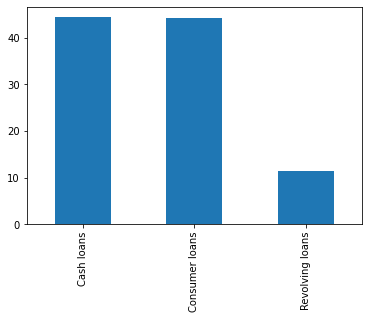

In [193]:
# plotting the NAME_CONTRACT_TYPE
contract_type = application_data_merge.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100
contract_type.plot.bar()
plt.show()

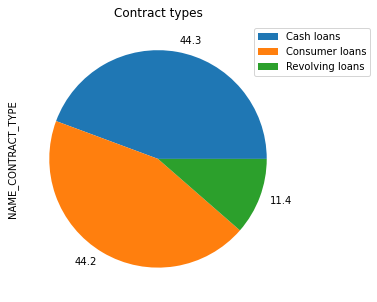

In [194]:
# let's check the percentage
# plotting the NAME_CONTRACT_TYPE
plt.figure(figsize=[16,5])
labels = contract_type.values.round(decimals=1)
contract_type.plot.pie(labels= labels)
legends = contract_type.index
plt.legend(legends, loc="upper right", bbox_to_anchor=(1.3,1))
plt.title("Contract types")
plt.show()

**Observation-** We can see, more than __40%__ of the loans taken are either Cash loans or Consumer loans and more than __~11%__  loans taken are Revolving loans.

**Payment method that client chose to pay for the previous application**

In [195]:
# check the values count
application_data_merge.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        882700
Non-cash from your account                     7100
Cashless from the account of the employer       941
Name: NAME_PAYMENT_TYPE, dtype: int64

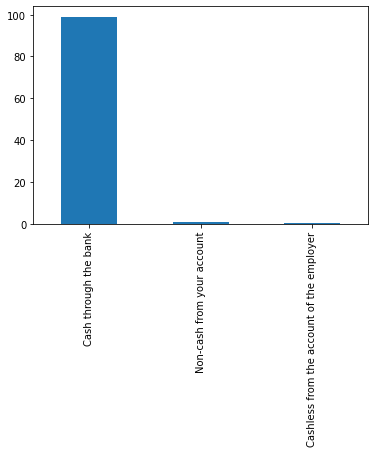

In [196]:
# plotting the NAME_PAYMENT_TYPE
payment_type = application_data_merge.NAME_PAYMENT_TYPE.value_counts(normalize=True)*100
payment_type.plot.bar()
plt.show()

**Observation-** We can observe, most loans that are given are cash through the bank and very less loans are non-cash or cashless from the account of the of the employer.

**Was the client old or new client when applying for the previous application**

In [197]:
# check the values count
application_data_merge.NAME_CLIENT_TYPE.value_counts()

Repeater     1037682
New           259540
Refreshed     114936
Name: NAME_CLIENT_TYPE, dtype: int64

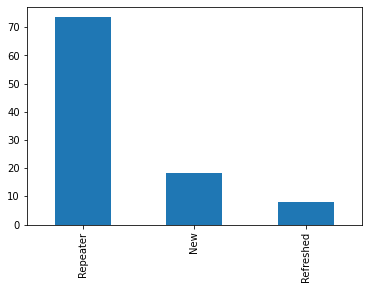

In [198]:
# plotting the NAME_CLIENT_TYPE
client_type = application_data_merge.NAME_CLIENT_TYPE.value_counts(normalize=True)*100
client_type.plot.bar()
plt.show()

**Observation-** Most of the previous loan application received are from repeater customers/clients. New clients and refreshed clients are comparatively less.

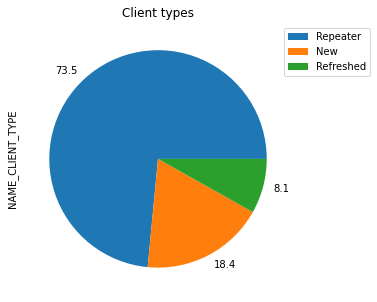

In [199]:
# let's check the percentage
# plotting the NAME_CLIENT_TYPE 
plt.figure(figsize=[16,5])
labels = client_type.values.round(decimals=1)
client_type.plot.pie(labels= labels)
legends = client_type.index
plt.legend(legends, loc="upper right", bbox_to_anchor=(1.3,1),)
plt.title("Client types")
plt.show()

**Observation-** We can see, __~73%__ of the clients are repeater and only __~18.4__ & __~8%__ are new and refreshed clients.

- **Univariate analysis of numerical columns**

**Checking Annuity of previous application**

In [200]:
# check null value percentage of AMT_ANNUITY
print("Null value percentage in AMT_ANNUITY: ", round(application_data_merge.AMT_ANNUITY.isnull().sum()/len(application_data_merge)*100, 2), "%")

Null value percentage in AMT_ANNUITY:  21.73 %


In [201]:
# check the distribution
application_data_merge.AMT_ANNUITY.describe()

count    1.106483e+06
mean     1.583718e+04
std      1.472491e+04
min      0.000000e+00
25%      6.257858e+03
50%      1.122376e+04
75%      2.042078e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

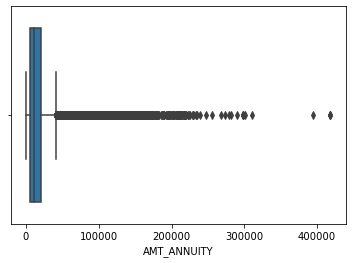

In [202]:
# plot for AMT_ANNUITY and check for outliers
sns.boxplot(application_data_merge.AMT_ANNUITY)
plt.show()

We have some continuous value but clearly values close to 400,000 is an outlier. So, we need to cap the outliers above maximum value during our further analysis.

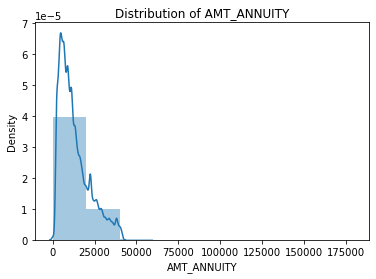

In [203]:
# check the distribution of data in AMT_ANNUITY column
max_annuity = application_data_merge.AMT_ANNUITY.quantile(0.75) + 1.5 * (application_data_merge.AMT_ANNUITY.quantile(0.75)-application_data_merge.AMT_ANNUITY.quantile(0.25))

bins=[i for i in range(0,200000,20000)]
plt.title('Distribution of AMT_ANNUITY')
sns.distplot(application_data_merge[application_data_merge.AMT_ANNUITY <= max_annuity].AMT_ANNUITY, bins=bins)
plt.show()

**Observation-** Maximum annuity amount for clients previously was in the range of __0-25,000__.

**Checking for Goods price of good that client on which credit or loan asked for (if applicable) on the previous application**

In [204]:
# check null value percentage of AMT_GOODS_PRICE
print("Null value percentage in AMT_GOODS_PRICE: ", round(application_data_merge.AMT_GOODS_PRICE.isnull().sum()/len(application_data_merge)*100, 2), "%")

Null value percentage in AMT_GOODS_PRICE:  22.6 %


In [205]:
# chck the distribution
application_data_merge.AMT_GOODS_PRICE.describe()

count    1.094176e+06
mean     2.264512e+05
std      3.159376e+05
min      0.000000e+00
25%      4.982850e+04
50%      1.102455e+05
75%      2.295000e+05
max      5.850000e+06
Name: AMT_GOODS_PRICE, dtype: float64

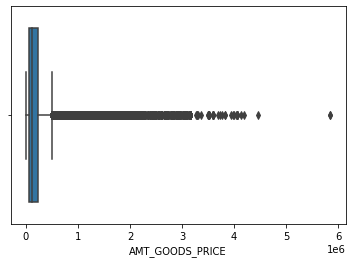

In [206]:
# plot for AMT_GOODS_PRICE and check for outliers
sns.boxplot(application_data_merge.AMT_GOODS_PRICE)
plt.show()

We have some continuous value but clearly some of the goods prices are very high. So, we can treat those goods prices as an outlier but the prices can be real . Hence, we need to cap the outliers above maximum value during our further analysis.

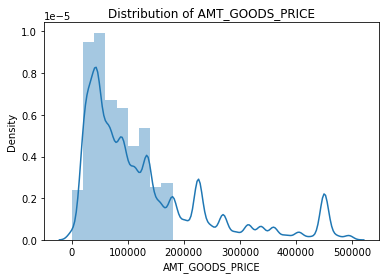

In [207]:
# check the distribution of data in AMT_GOODS_PRICE column

max_goods_price = application_data_merge.AMT_GOODS_PRICE.quantile(0.75) + 1.5 * (application_data_merge.AMT_GOODS_PRICE.quantile(0.75)-application_data_merge.AMT_GOODS_PRICE.quantile(0.25))

bins=[i for i in range(0,200000,20000)]
plt.title('Distribution of AMT_GOODS_PRICE')
sns.distplot(application_data_merge[application_data_merge.AMT_GOODS_PRICE <= max_goods_price].AMT_GOODS_PRICE, bins=bins)
plt.show()

**Observation-** In general, the goods price are in all ranges, but maximum loans are taken for goods price amount which ranges between __0-200,000__(approx)

- ### Bivariate and Multivariate Analysis

Let us see how __AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT and AMT_GOODS_PRICE__ correlate with each other.

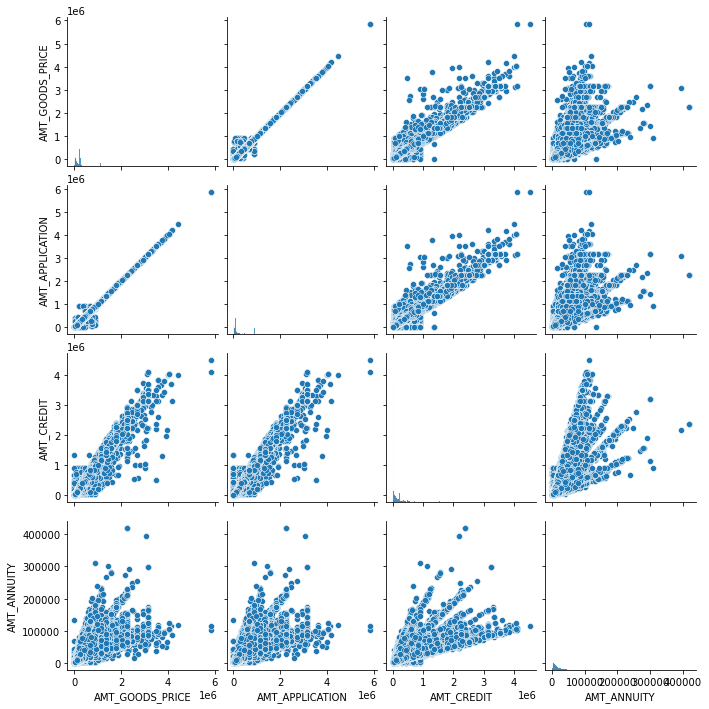

In [208]:
# let us plot a pair plot to check how the columns are  co-relating in application_data_merge dataset
sns.pairplot(data=application_data_merge, vars=["AMT_GOODS_PRICE", "AMT_APPLICATION", "AMT_CREDIT", "AMT_ANNUITY"])
plt.show()

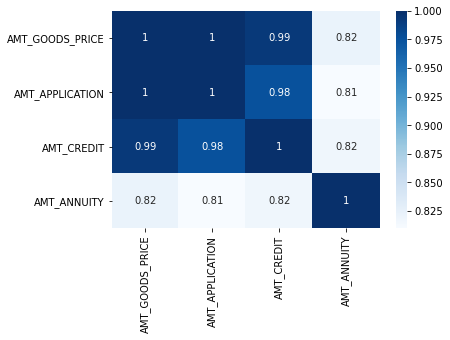

In [209]:
# correlation heat map
sns.heatmap(application_data_merge[["AMT_GOODS_PRICE", "AMT_APPLICATION", "AMT_CREDIT", "AMT_ANNUITY"]].corr(), annot=True, cmap="Blues")
plt.show()

**Observation-** We can see, that Goods price amount, Application amount, Credit amount and Annuity amount has a vey high positive correlation among themselves. If any of them increases then others incresses as well. Let's say if a client wants to buy something whose price is 25,000 then application amount and credit amount may lie between 25,000-30,000(more or less). But, if a client wants to buy something whose price is 100,000 then application amount and credit amount may lie between 100,000-120,000(more or less). Similarly, the annuity also increases with the credit amount.

**Checking how types of loans gets approved, cancelled or rejected with respect to Credit amount**

In [210]:
#  creating a pivot table NAME_CONTRACT_TYPE vs NAME_CONTRACT_STATUS vs AMT_CREDIT
result_contract_types = pd.pivot_table(data=application_data_merge, index='NAME_CONTRACT_TYPE', columns="NAME_CONTRACT_STATUS", values="AMT_CREDIT")
result_contract_types

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CONTRACT_TYPE,,,,
Cash loans,421491.718858,28503.887624,532105.286008,2812.500000
Consumer loans,88638.564129,39824.123702,112834.927537,71051.766177
Revolving loans,227605.355128,2549.659501,226182.698562,50625.000000


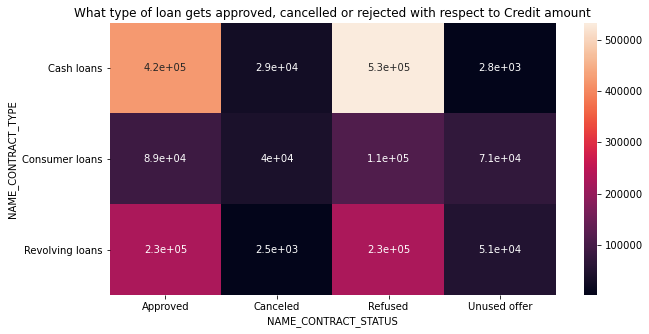

In [211]:
# plotting a heat map to understand better
plt.figure(figsize=[10,5])

sns.color_palette("flare", as_cmap=True)
sns.heatmap(result_contract_types, annot=True)
plt.yticks(rotation=0)
plt.title('What type of loan gets approved, cancelled or rejected with respect to Credit amount')

plt.show()

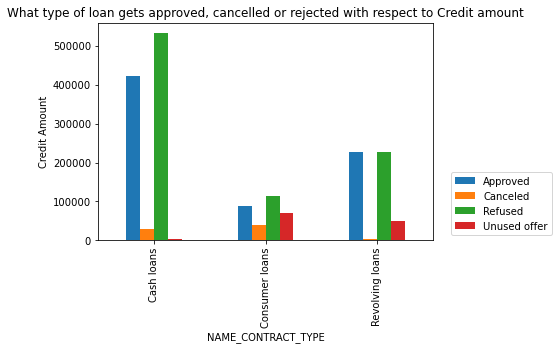

In [212]:
# We can also get a good idea from bar chart
result_contract_types.plot.bar()
plt.title('What type of loan gets approved, cancelled or rejected with respect to Credit amount')
plt.legend(bbox_to_anchor=(1.37,0), loc="lower right")
plt.ylabel('Credit Amount')
plt.show()

**Observation-**
1. Cash loans delivers the most credit amount
2. Cash loans of high credit amounts gets approved more rather than Consumer and Revolving loans.<br>
But approving or cancelling may depend on other factors also.

**Checking how client types gets approved, cancelled or rejected with respect to Credit amount**

In [213]:
#  creating a pivot table NAME_CLIENT_TYPE vs NAME_CONTRACT_STATUS vs AMT_CREDIT
result_client_types = pd.pivot_table(data=application_data_merge, index='NAME_CLIENT_TYPE', columns="NAME_CONTRACT_STATUS", values="AMT_CREDIT")
result_client_types

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CLIENT_TYPE,,,,
New,102964.822211,30366.132534,173918.436511,79936.321020
Refreshed,203546.243704,36028.613785,348777.857125,67986.541520
Repeater,244003.721822,23976.246589,382614.658687,69031.200383


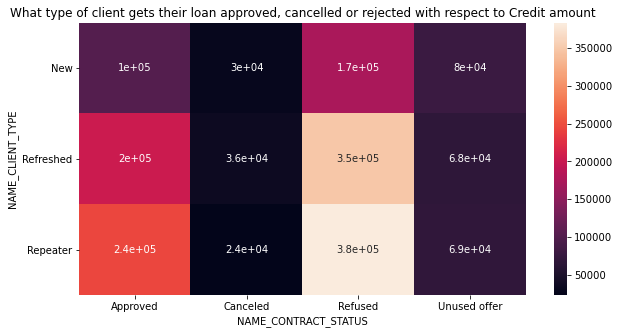

In [214]:
# plotting a heat map to understand better
plt.figure(figsize=[10,5])

sns.color_palette("flare", as_cmap=True)
sns.heatmap(result_client_types, annot=True)
plt.yticks(rotation=0)
plt.title('What type of client gets their loan approved, cancelled or rejected with respect to Credit amount')

plt.show()

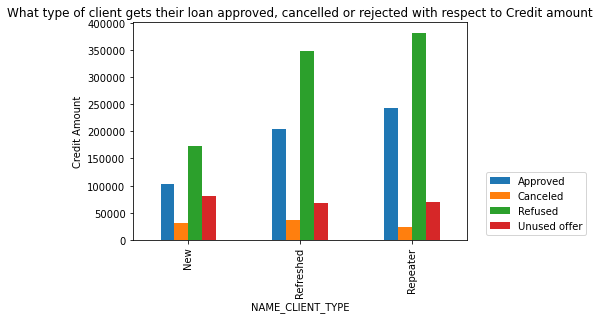

In [215]:
# We can also get a good idea from bar chart
result_client_types.plot.bar()
plt.title('What type of client gets their loan approved, cancelled or rejected with respect to Credit amount')
plt.legend(bbox_to_anchor=(1.37,0), loc="lower right")
plt.ylabel('Credit Amount')
plt.show()

**Observation-**
1. If the client is a repeater and his application amount is high, then most likely their loan gets approved rather than new and refreshed clients.
2. Overall loan approval rate is more on less credit amount and are rejected if credit amount is more.<br>
But approving, refusing or cancelling may depend on other factors also.

## Insights

### 1. Application Dataset
- Almost 92% of people/applicants do not have payment difficulties but remaining 8% of people/applicants have payment difficulties.
- Clients with very high income has no difficulty regarding the payments of the loan, whereas clients with lower income has difficulty regarding the payments of the loan.
- Higher the amount of loan is taken by the client, in those cases the payment difficulties are less.
- Students and Businessman don't have any difficulties in the payment. Pensioner, Commercial Associate and State servants have a better chance of paying the loan without difficulty. For Working, Unemployed and Maternity leave clients other variables should be taken into account before approving the loan, as they have a 50-50 chance with payment difficulties.
- Clients with Academic degree and Higher education have less difficulty in payments.
- Clients who live in rented apartments or live with parents are more likely to have payment difficulties.
- Labourers, Drivers, Low-skill labourers, Cooking staff, Cleaning staff are more likely to have payment difficulties. Accountants, Managers, IT-staff, HR-staffs are lesss likely to have payment difficulties. As, Labourers and staffs earn less they have more payment difficulties rather than Accountants or Managers who earn more and have less payment difficulties.
- Age group of less than 30 and 30-40 has more difficulties to pay the loans. Age group of 40-50, 50-60 and 60+ has less difficulties to pay the loans.
- Clients who are employed more number of years do not face payment difficulties, whereas clients who are employed less number of years faces payment difficulties.
- Clients who have payment difficulty, their credit amount is also lower rather than Clients who don't have payment difficulty. Businessman who has a "HIGH" Income gets most Loan Credit, whereas clients who are on Maternity leave and have "VERY LOW" Income gets the least Loan Credit. Income type of Maternity leave with low income tends to be a good indication of defaulter. Businessman and students can be a good client for the company as they don’t have such payment difficulties.
- Clients who have difficulty in payments, if their age is less than 30 or between 30-40 and Income is low then they get less loan credit as they clearly shows indication of becoming a defaulter. Clients who don't have difficulty in payments, if they are in age group of 40-50, 50-60 or more than 60 and have a high Income gets more loan credit.


### 2. Previous Application Dataset
- More than 40% of the loans taken are either Cash loans or Consumer loans and more than ~11% loans taken are Revolving loans.
- Most loans that are given are cash through the bank and very less loans are non-cash or cashless from the account of the of the employer.
- Most of the previous loan application received are from repeater customers/clients. New clients and refreshed clients are comparatively less.
- Maximum loans are taken for goods price amount which ranges between 0-200,000(approx)
- Cash loans of high credit amounts gets approved more rather than Consumer and Revolving loans.
- If the client is a repeater and his application amount is high, then most likely their loan gets approved rather than new and refreshed clients.

##### -----Thankyou-----